## PARTIE 1: importation des librairies et tables de données

In [264]:
! pip install pingouin


In [265]:
import pingouin as pg

In [266]:
from google.colab import drive

In [267]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as px
import numpy as np


In [269]:
df=pd.read_csv("/content/drive/MyDrive/P3_encours/fr.openfoodfacts.org.products.csv", sep='\t')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



## PARTIE 2 : Qualité des données 

Analyse préexploratoire des données 

In [270]:
df.head()


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   États-Unis  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2   États-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3   États-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
4   États-Unis                                    Organic polenta       NaN   

  allergens_fr traces traces_tags traces_fr     serving_size  no_nutriments  \
0          NaN    NaN 

In [271]:
df.shape


(320772, 162)

## Revue du dataframe, taille, données manquantes, doublons 

In [272]:
## FONCTION INFO
def desc_bis (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col   
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    print("Nb de lignes =", (nb_li))
    print("Nb de colonnes =",(nb_col))
    return infos
    
## FONCTION DE COMPTAGE DES VALEURS NULLES 
def evalNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))

# Ensemble de fonctions pour l'analyse pre-exploratoire

## fonction prenant un dataframe en entrée et renvoie le nombre de lignes
def nb_lines(data):
    return len(data)

##fonction prenant un dataframe en entrée et renvoie le nombre de colonnes
def nb_columns(data):
    return len(data.columns)

## fonction prenant un dataframe en entrée et renvoie le nombre de cellules manquantes
def missing_cells(data):
    return data.isna().sum().sum()

## fonction prenant un dataframe en entrée et renvoie le pourcentage de cellules manquantes
def missing_cells_percent(data):
    return data.isna().sum().sum()/(data.size)

## fonction prenant un dataframe en entrée et renvoie le nombre de lignes en double
def count_duplicates_rows(data):
    return len(data)-len(data.drop_duplicates())

## fonction prenant un dataframe en entrée et renvoie le pourcentage de lignes en double
def count_duplicates_rows_percent(data):
    return count_duplicates_rows(data)/nb_lines(data)

##fonction prenant un Dataframe en entrée et imprime un résumé du Dataframe contenant
    #nombre de lignes, de colonnes, de cellules manquantes et de lignes en double

##fonction qui renvoie le nom de la variable dans l'espace de noms
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
def data_set_overview(data):    
   
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Nombre de variables (colonnes) : {}'.format(nb_columns(data)))
    print('Nombre d observations (lignes) : {}'.format(nb_lines(data)))
    print('Données manquantes en % : {:.2%}'.format(missing_cells_percent(data)))
    print('Lignes en double : {}'.format(count_duplicates_rows(data)))
    print('Lignes en double en % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    return None  
   

 ##fonction prenant un dataframe en entrée et retourne un résumé contenant
    #nom, type, valeurs distinctes, valeurs manquantes et statistiques numériques de la variable
    #pour les variables numériques         
def dataset_variables_overview(data):
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max'])
    for column in data.columns:
        var_type = data[column].dtypes
        distinct = len(data[column].unique())
        percent_distinct = len(data[column].unique())/len(data[column])
        missing = missing_cells(data[column])
        percent_missing = missing_cells_percent(data[column])
        if var_type != 'object':       
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,data[column].mean(),data[column].median(),data[column].skew(),data[column].kurtosis(),data[column].var(ddof=0),
                                          data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.5),data[column].quantile(0.75),data[column].max()]], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max']))
        else:            
            df = df.append(pd.DataFrame([[column,var_type,distinct,percent_distinct,missing,percent_missing,'','','','','','',''
                                    ,'','','','']], columns=['Variable name','Variable type','Distinct','% distinct','Missing','% missing', 'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 'min','25%','50%','75%','max']))
               
    return df


In [273]:
inf_df = desc_bis(df).append(df.describe(include='all'))
evalNull(inf_df)
inf_df
# 320749 url uniques mais 320638 codes : il y a bien des doublons dans "code" (je garde la dernière version)

Nb de lignes = 320772
Nb de colonnes = 162
% total valeurs 'null' : 76.2%


code                                                url  \
Type           object                                             object   
null               23                                                 23   
count        320749.0                                             320749   
unique       320638.0                                             320749   
top     24463061071.0  http://world-fr.openfoodfacts.org/produit/0000...   
freq              2.0                                                  1   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                                NaN   
25%               NaN                                                NaN   
50%               NaN                                                NaN   
75%               NaN                                                NaN   
max               NaN                                                NaN   

                creator     created_t      created_datetime last_modified_t  \
Type             object        object                object          object   
null                  2             3                     9               0   
count            320770      320769.0                320763        320772.0   
unique             3535      189636.0                189568        180639.0   
top     usda-ndb-import  1489077120.0  2017-03-09T10:37:09Z    1439141742.0   
freq             169868          20.0                    20            33.0   
mean                NaN           NaN                   NaN             NaN   
std                 NaN           NaN                   NaN             NaN   
min                 NaN           NaN                   NaN             NaN   
25%                 NaN           NaN                   NaN             NaN   
50%                 NaN           NaN                   NaN             NaN   
75%                 NaN           NaN                   NaN             NaN   
max                 NaN           NaN                   NaN             NaN   

       last_modified_datetime product_name  \
Type                   object       object   
null                        0        17762   
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   
mean                      NaN          NaN   
std                       NaN          NaN   
min                       NaN          NaN   
25%                       NaN          NaN   
50%                       NaN          NaN   
75%                       NaN          NaN   
max                       NaN          NaN   

                                             generic_name quantity packaging  \
Type                                               object   object    object   
null                                               267977   215953    241812   
count                                               52795   104819     78960   
unique                                              38584    13826     14547   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g    Carton   
freq                                                  201     4669      2153   
mean                                                  NaN      NaN       NaN   
std                                                   NaN      NaN       NaN   
min                                                   NaN      NaN       NaN   
25%                                                   NaN      NaN       NaN   
50%                                                   NaN      NaN       NaN   
75%                                                   NaN      NaN       NaN   
max                                                   NaN      NaN       NaN   

          packaging_tags     brands brands_tags  \
Type              object    

In [274]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [275]:
data_set_overview(df)

--------------------------------------------------------------------------
Data : ['df']
Nombre de variables (colonnes) : 162
Nombre d observations (lignes) : 320772
Données manquantes en % : 76.22%
Lignes en double : 0
Lignes en double en % : 0.00%


In [276]:
data=df.sort_values(by=["last_modified_datetime"], ascending=True)

In [277]:
data=df.drop_duplicates(subset=["code"], keep='last')

In [278]:
data_set_overview(data)

--------------------------------------------------------------------------
Data : ['data']
Nombre de variables (colonnes) : 162
Nombre d observations (lignes) : 320639
Données manquantes en % : 76.22%
Lignes en double : 0
Lignes en double en % : 0.00%


In [279]:
data.describe(include="all")

code                                                url  \
count   320638.0                                             320638   
unique  320638.0                                             320638   
top       3087.0  http://world-fr.openfoodfacts.org/produit/0000...   
freq         1.0                                                  1   
mean         NaN                                                NaN   
std          NaN                                                NaN   
min          NaN                                                NaN   
25%          NaN                                                NaN   
50%          NaN                                                NaN   
75%          NaN                                                NaN   
max          NaN                                                NaN   

                creator     created_t      created_datetime  last_modified_t  \
count            320637  3.206390e+05                320637     3.206390e+05   
unique             3534  1.896010e+05                189530     1.806160e+05   
top     usda-ndb-import  1.489077e+09  2017-03-09T16:32:00Z     1.439142e+09   
freq             169776  2.000000e+01                    20     3.300000e+01   
mean                NaN           NaN                   NaN              NaN   
std                 NaN           NaN                   NaN              NaN   
min                 NaN           NaN                   NaN              NaN   
25%                 NaN           NaN                   NaN              NaN   
50%                 NaN           NaN                   NaN              NaN   
75%                 NaN           NaN                   NaN              NaN   
max                 NaN           NaN                   NaN              NaN   

       last_modified_datetime product_name  \
count                  320639       302878   
unique                 180472       221277   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   
mean                      NaN          NaN   
std                       NaN          NaN   
min                       NaN          NaN   
25%                       NaN          NaN   
50%                       NaN          NaN   
75%                       NaN          NaN   
max                       NaN          NaN   

                                             generic_name quantity packaging  \
count                                               52772   104787     78952   
unique                                              38561    13812     14545   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g    Carton   
freq                                                  201     4668      2153   
mean                                                  NaN      NaN       NaN   
std                                                   NaN      NaN       NaN   
min                                                   NaN      NaN       NaN   
25%                                                   NaN      NaN       NaN   
50%                                                   NaN      NaN       NaN   
75%                                                   NaN      NaN       NaN   
max                                                   NaN      NaN       NaN   

          packaging_tags     brands brands_tags  \
count              78953     292256      292248   
unique             12063      58779       50249   
top     sachet,plastique  Carrefour   carrefour   
freq                3959       2978        3149   
mean                 NaN        NaN         NaN   
std                  NaN        NaN         NaN   
min                  NaN        NaN         NaN   
25%                  NaN        NaN         NaN   
50%                  NaN        NaN         NaN   
75%                  NaN        NaN         NaN   
max                  NaN        NaN         NaN   

                                        categories  \
count            

In [280]:
data.pnns_groups_2.unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [281]:
#regardons la complétude de nutrition grade
data['nutrition_grade_fr'].isna().sum()

99504

In [282]:
data['nutrition_grade_uk'].isna().sum()

320639

In [283]:
data['nutrition-score-fr_100g'].isna().sum()

99504

In [284]:
data['nutrition-score-uk_100g'].isna().sum()

99504

In [285]:
#je drope les valeurs manquantes sur la colonne nutrition_grade 
data_filt=data.dropna(subset=['nutrition_grade_fr'], how="any") 

In [286]:
data_set_overview(data_filt)

--------------------------------------------------------------------------
Data : ['data_filt']
Nombre de variables (colonnes) : 162
Nombre d observations (lignes) : 221135
Données manquantes en % : 73.13%
Lignes en double : 0
Lignes en double en % : 0.00%


In [287]:
inf_data_filt = desc_bis(data_filt).append(data_filt.describe(include='all'))
evalNull(inf_data_filt)
inf_data_filt

Nb de lignes = 221135
Nb de colonnes = 162
% total valeurs 'null' : 73.1%


code                                                url  \
Type      object                                             object   
null           0                                                  0   
count   221135.0                                             221135   
unique  221135.0                                             221135   
top       4530.0  http://world-fr.openfoodfacts.org/produit/0000...   
freq         1.0                                                  1   
mean         NaN                                                NaN   
std          NaN                                                NaN   
min          NaN                                                NaN   
25%          NaN                                                NaN   
50%          NaN                                                NaN   
75%          NaN                                                NaN   
max          NaN                                                NaN   

                creator     created_t      created_datetime last_modified_t  \
Type             object        object                object          object   
null                  0             0                     1               0   
count            221135      221135.0                221134        221135.0   
unique             2366      122492.0                122462        116826.0   
top     usda-ndb-import  1489055829.0  2017-03-09T10:37:09Z    1439141749.0   
freq             137549          20.0                    20            23.0   
mean                NaN           NaN                   NaN             NaN   
std                 NaN           NaN                   NaN             NaN   
min                 NaN           NaN                   NaN             NaN   
25%                 NaN           NaN                   NaN             NaN   
50%                 NaN           NaN                   NaN             NaN   
75%                 NaN           NaN                   NaN             NaN   
max                 NaN           NaN                   NaN             NaN   

       last_modified_datetime product_name  \
Type                   object       object   
null                        0         2747   
count                  221135       218388   
unique                 116742       160498   
top      2015-08-09T17:35:49Z    Ice Cream   
freq                       23          409   
mean                      NaN          NaN   
std                       NaN          NaN   
min                       NaN          NaN   
25%                       NaN          NaN   
50%                       NaN          NaN   
75%                       NaN          NaN   
max                       NaN          NaN   

                                             generic_name quantity packaging  \
Type                                               object   object    object   
null                                               182188   158900    166800   
count                                               38947    62235     54335   
unique                                              29459     8819     11218   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g    Carton   
freq                                                  177     3104      1698   
mean                                                  NaN      NaN       NaN   
std                                                   NaN      NaN       NaN   
min                                                   NaN      NaN       NaN   
25%                                                   NaN      NaN       NaN   
50%                                                   NaN      NaN       NaN   
75%                                                   NaN      NaN       NaN   
max                                                   NaN      NaN       NaN   

          packaging_tags     brands brands_tags  \
Type              object     object      object   
null              166800       4638       

### Revue du contenu des variables 

 Comment sont classés les produits ? 

In [288]:
data_filt.generic_name.unique() # 29640 "generic name" : classification / description du produit

array([nan, 'Laitue en salade', 'Pâtisserie', ...,
       'Pastilles avec chlorophylle au gout menthe avec édulcorants',
       'tuna chunks in spring water', 'thé bio équitable'], dtype=object)

In [289]:
data_filt['pnns_groups_1']
#pnns renvoit une classification de produits 

1                          NaN
2                          NaN
3                          NaN
7                          NaN
12                         NaN
                  ...         
320742                     NaN
320751    Cereals and potatoes
320757                     NaN
320763               Beverages
320768                     NaN
Name: pnns_groups_1, Length: 221135, dtype: object

In [290]:
data_filt.categories # categories en français 

1                                     NaN
2                                     NaN
3                                     NaN
7                                     NaN
12                                    NaN
                       ...               
320742                                NaN
320751    Biscottes au sarrasin,Biscottes
320757                                NaN
320763                         thés verts
320768                                NaN
Name: categories, Length: 221135, dtype: object

In [291]:
data_filt['pnns_groups_1'].isna().sum()
#il y a des gammes de produits qui se trouvent à la fois dans pnns 1 et 2 (pnns=Programme National Nutrition Santé)

159338

In [292]:
data_filt['pnns_groups_2'].isna().sum()

159231

In [293]:
data_filt['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes',
       'Pizza pies and quiche', 'Sweets', 'Sweetened beverages',
       'One-dish meals', 'Soups', 'Meat', 'Cereals', 'Fruits',
       'Milk and yogurt', 'Fats', 'Non-sugared beverages', 'Cheese',
       'Dressings and sauces', 'Chocolate products', 'Sandwich', 'Bread',
       'Nuts', 'Legumes', 'Breakfast cereals', 'Appetizers',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'vegetables', 'pastries',
       'Dairy desserts', 'Alcoholic beverages', 'Potatoes',
       'Artificially sweetened beverages', 'Fruit nectars', 'fruits',
       'Salty and fatty products', 'Tripe dishes', 'cereals', 'legumes',
       'nuts'], dtype=object)

In [294]:
#catégories de produits 
data_filt.main_category.unique() # "en" categories 

array([nan, 'en:fresh-vegetables', 'en:pastries', ...,
       'en:balsamic-vinaigrette',
       'en:cremes-vegetales-a-base-de-coco-pour-cuisiner',
       'en:asian-grocery'], dtype=object)

In [295]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221135 entries, 1 to 320768
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 275.0+ MB


### Drop colonnes vides (isna>99%)


In [296]:
data_filt.shape

(221135, 162)

In [297]:
#drop les colonnes vides avec seuil 99% : me permet de conserver colonnes fruits et vegetables
column_with_nan = data_filt.columns[data_filt.isnull().any()]
for column in column_with_nan:
  if data_filt[column].isnull().sum()*100.0/len(data_filt) > 99:
    data_filt.drop(column,1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
data_filt.shape
#je passe de 162 à 89 colonnes.

(221135, 89)

### Liste de variables à exploiter 

In [299]:
(dataset_variables_overview(data_filt))

--------------------------------------------------------------------------
Data : ['data_filt']
--------------------------------------------------------------------------


Variable name Variable type Distinct  \
0                                        code        object   221135   
0                                         url        object   221135   
0                                     creator        object     2366   
0                                   created_t        object   122492   
0                            created_datetime        object   122463   
0                             last_modified_t        object   116826   
0                      last_modified_datetime        object   116742   
0                                product_name        object   160499   
0                                generic_name        object    29460   
0                                    quantity        object     8820   
0                                   packaging        object    11219   
0                              packaging_tags        object     9358   
0                                      brands        object    40099   
0                                 brands_tags        object    35106   
0                                  categories        object    25552   
0                             categories_tags        object    14646   
0                               categories_fr        object    14646   
0                                     origins        object     3095   
0                                origins_tags        object     2786   
0                        manufacturing_places        object     4779   
0                   manufacturing_places_tags        object     4421   
0                                      labels        object    13798   
0                                 labels_tags        object    10379   
0                                   labels_fr        object    10379   
0                                   emb_codes        object     5939   
0                              emb_codes_tags        object     5730   
0                    first_packaging_code_geo        object     1163   
0                                 cities_tags        object     1946   
0                             purchase_places        object     4036   
0                                      stores        object     2366   
0                                   countries        object      897   
0                              countries_tags        object      502   
0                                countries_fr        object      502   
0                            ingredients_text        object   165533   
0                                   allergens        object    11605   
0                                      traces        object     7023   
0                                 traces_tags        object     2995   
0                                   traces_fr        object     2995   
0                                serving_size        object    22961   
0                                 additives_n       float64       32   
0                                   additives        object   158734   
0                              additives_tags        object    34533   
0                                additives_fr        object    34533   
0                 ingredients_from_palm_oil_n       float64        4   
0              ingredients_from_palm_oil_tags        object       15   
0     ingredients_that_may_be_from_palm_oil_n       float64        8   
0  ingredients_that_may_be_from_palm_oil_tags        object      140   
0                          nutrition_grade_fr        object        5   
0                               pnns_groups_1        object       15   
0                               pnns_groups_2        object       43   
0                                      states        object      512   
0                                 states_tags        object      512   
0                                   states_fr        object      512   
0                               main_category        object     2020   
0                            main_category_fr        object     2020   


## Revue des différentes variables (countries, origins...)

### Regardons comment les produits sont classés 

In [300]:
data.categories.unique()
len(list(data_filt.main_category.unique())) # categories de produits 
len(list(data_filt.categories.unique())) # sous-categories de produits
list(data_filt.pnns_groups_2.unique())
len(list(data_filt.pnns_groups_2.unique())) #environ 40 catégories car il y a des doublons  
len(list(data_filt.pnns_groups_1.unique())) # n=15 :pnns_1 moins complet que pnns_2 mais c'est suffisant 

15

In [301]:
data_filt.purchase_places.unique() #si on recommande le client selon l'endroit ou il vit 

array([nan, 'Roissy,France', 'Brossard Québec', ..., 'NT,Australia',
       'São Paulo - São Paulo - Brasil', 'Waimauku,Auckland,New Zealand'],
      dtype=object)

In [302]:
#manufacturing place : si on cible impact carbone et consommation locale
data_filt.manufacturing_places.unique()


array([nan, 'Brossard Québec', 'Brossard,Québec', ...,
       'Porirua,New Zealand', 'Singapour', 'spain'], dtype=object)

In [303]:
list(data_filt.allergens.unique()) #11605 allergenes 
len(list(data_filt.allergens.unique()))


11605

In [304]:
#list(data_filt.countries_fr.unique()) # liste des pays de vente

In [305]:
# premier filtrage en fonction de la nature des variables et leur adéquation avec une idée d'application
filt_data=data_filt[['code', 'url',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'countries_fr',
 'quantity',
 'packaging',
 'brands',
 'categories',
 'labels',
 'stores',
 'ingredients_text',
 'allergens',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'main_category',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts_100g']]

## Nettoyage des doublons dans la classification pnns_1 (fonction replace)

In [306]:
#nettoyage de la liste de pnns_groups_1 
filt_data.replace('cereals-and-potatoes', 'Cereals and potatoes', inplace=True)
filt_data.replace('fruits-and-vegetables', 'Fruits and vegetables', inplace=True)
filt_data.replace('sugary-snacks', 'Sugary snacks', inplace=True)
filt_data.replace('salty-snacks', 'Salty snacks', inplace=True)
#methode replacement ? method{‘pad’, ‘ffill’, ‘bfill’, None}. The method to use when for replacement, when to_replace is a scalar, list or tuple and value is None.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Exploration des données 

### Analyse de la distribution des variables 

In [307]:
filt_data.shape

(221135, 45)

In [308]:
(dataset_variables_overview(filt_data))

--------------------------------------------------------------------------
Data : ['filt_data']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                                     code        object   221135    1.000000   
0                                      url        object   221135    1.000000   
0                   last_modified_datetime        object   116742    0.527922   
0                             product_name        object   160499    0.725796   
0                             generic_name        object    29460    0.133222   
0                             countries_fr        object      502    0.002270   
0                                 quantity        object     8820    0.039885   
0                                packaging        object    11219    0.050734   
0                                   brands        object    40099    0.181333   
0                               categories        object    25552    0.115549   
0                                   labels        object    13798    0.062396   
0                                   stores        object     2366    0.010699   
0                         ingredients_text        object   165533    0.748561   
0                                allergens        object    11605    0.052479   
0                             serving_size        object    22961    0.103833   
0                              additives_n       float64       32    0.000145   
0                                additives        object   158734    0.717815   
0                           additives_tags        object    34533    0.156163   
0              ingredients_from_palm_oil_n       float64        4    0.000018   
0  ingredients_that_may_be_from_palm_oil_n       float64        8    0.000036   
0                       nutrition_grade_fr        object        5    0.000023   
0                            pnns_groups_1        object       11    0.000050   
0                            pnns_groups_2        object       43    0.000194   
0                                   states        object      512    0.002315   
0                              states_tags        object      512    0.002315   
0                            main_category        object     2020    0.009135   
0                          image_small_url        object    43801    0.198074   
0                              energy_100g       float64     3722    0.016831   
0                                 fat_100g       float64     3261    0.014747   
0                       saturated-fat_100g       float64     2157    0.009754   
0                 monounsaturated-fat_100g       float64     1026    0.004640   
0                 polyunsaturated-fat_100g       float64      900    0.004070   
0                           trans-fat_100g       float64      421    0.001904   
0                         cholesterol_100g       float64      498    0.002252   
0                       carbohydrates_100g       float64     5239    0.023691   
0                              sugars_100g       float64     3946    0.017844   
0                               fiber_100g       float64      975    0.004409   
0                            proteins_100g       float64     2413    0.010912   
0                                salt_100g       float64     5032    0.022755   
0                              sodium_100g       float64     4766    0.021552   
0                           vitamin-a_100g       float64     2194    0.009922   
0                           vitamin-c_100g       float64     1049    0.004744   
0                             calcium_100g       float64      973    0.004400   
0                                iron_100g       float64     1089    0.004925   
0              fruits-vegetables-nuts_100g       float64      320    0.001447   

  Missing  % missing         Mean   Median        Skew       Kurtosis  \
0       0   0.000000                                                    
0       0   0.000000                                                    
0       0   0.000000                                                    
0    2747 

### Traitement des outliers 

In [309]:
list_clip=['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts_100g']

In [310]:
#je clip les variables continues "_100g" : devant être entre 0 et 100g
for column in list_clip:
  if [column]!=[0, 100] :
     filt_data[column].clip(lower=0, upper=100, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [311]:
#Energy doit être >0!
filt_data["energy_100g"].clip(lower=0,  inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
 filt_data.describe() #vérification de la fonction clip (0-100g)

additives_n  ingredients_from_palm_oil_n  \
count  196104.000000                196104.000000   
mean        1.982020                     0.021876   
std         2.526639                     0.148012   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g       fat_100g  \
count                            196104.000000  2.209450e+05  203660.000000   
mean                                  0.057327  1.196258e+03      13.360864   
std                                   0.275290  6.990759e+03      16.114583   
min                                   0.000000  0.000000e+00       0.000000   
25%                                   0.000000  4.520000e+02       0.880000   
50%                                   0.000000  1.195000e+03       7.140000   
75%                                   0.000000  1.715000e+03      21.430000   
max                                   6.000000  3.251373e+06     100.000000   

       saturated-fat_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
count       220945.000000              20149.000000              20177.000000   
mean             4.966966                  7.211476                  4.988952   
std              7.563328                 11.301584                  8.325407   
min              0.000000                  0.000000                  0.000000   
25%              0.000000                  0.000000                  0.000000   
50%              1.790000                  3.330000                  1.790000   
75%              7.140000                  8.930000                  6.060000   
max            100.000000                100.000000                 75.000000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   135391.000000     137137.000000       203633.000000  220945.000000   
mean         0.068306          0.019239           33.225722      15.007854   
std          1.111290          0.366616           28.315272      19.826113   
min          0.000000          0.000000            0.000000       0.000000   
25%          0.000000          0.000000            7.000000       1.300000   
50%          0.000000          0.000000           24.000000       5.000000   
75%          0.000000          0.020000           59.000000      23.080000   
max        100.000000         95.238000          100.000000     100.000000   

          fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  193698.000000  220945.000000  220945.000000  220945.000000   
mean        2.800827       7.774054       1.259192       0.503417   
std         4.488759       8.076395       4.222813       1.942469   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.900000       0.100000       0.039370   
50%         1.500000       5.700000       0.647700       0.255000   
75%         3.600000      10.710000       1.361440       0.536000   
max       100.000000     100.000000     100.000000     100.000000   

       vitamin-a_100g  vitamin-c_100g   calcium_100g      iron_100g  \
count   132042.000000   132916.000000  135314.000000  134574.000000   
mean         0.000144        0.007890       0.101607       0.003103   
std          0.002323        0.300773       0.761999       0.172267   
min          0.000000        0.000000       0.000000       0.000000   
25%          0.000000        0.000000       0.000000       0.000000   
50%          0.000000        0.000000       0.036000       0.001010   
75%          0.000102        0.002800       0.107000       0.002400   
max          0.800000      100.000000     100.000000      50.000000   

       fruits-vegetables-nuts_100g  
count                  2817.000000  
mean                     30.078442  
std          

### Methode IQR 
Sur la variable "énergie", non clipée

In [313]:
import scipy.stats as scipy
import numpy as np

In [314]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [315]:
#est-ce que ça applique le traitement ? 
lower_range, upper_range=outlier_treatment(filt_data['energy_100g'])


In [316]:
data_IQR=filt_data[filt_data['energy_100g'].between(0, 3609.5)]

In [317]:
filt_data["energy_100g"].describe()

count    2.209450e+05
mean     1.196258e+03
std      6.990759e+03
min      0.000000e+00
25%      4.520000e+02
50%      1.195000e+03
75%      1.715000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [318]:
data_IQR["energy_100g"].describe()
#728 outliers retirés

count    220217.000000
mean       1169.269695
std         749.815412
min           0.000000
25%         450.000000
50%        1184.000000
75%        1707.000000
max        3607.000000
Name: energy_100g, dtype: float64

### Sélection de variables 


Matrice de complétude des variables 

In [319]:
import missingno as msno

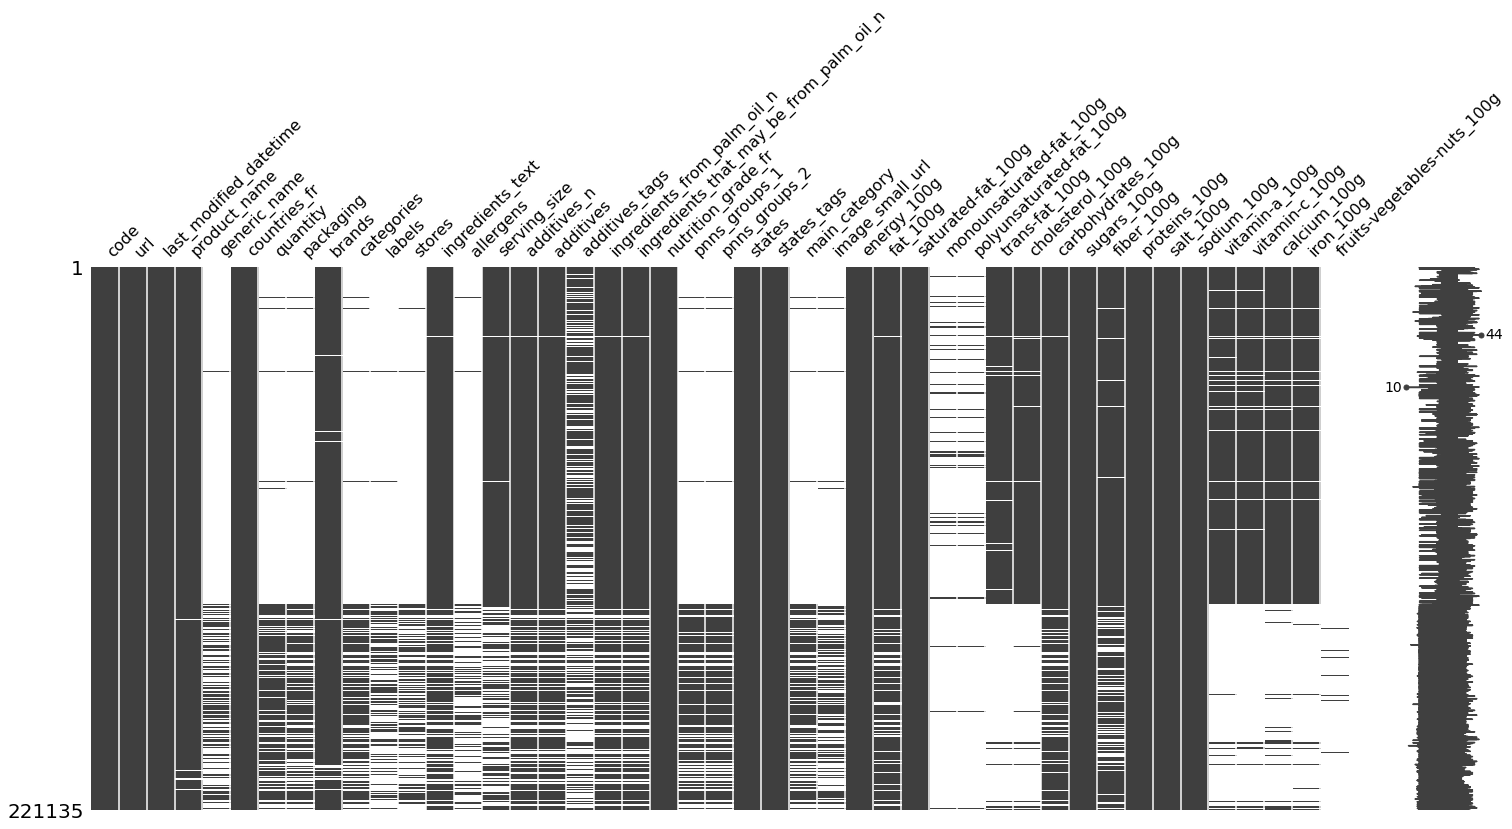

In [320]:
msno.matrix(filt_data)
#environ une trentaine de variables renseignées sur plus de 50% des lignes > lequelles sont d'intéret ??

In [321]:
# On peut éliminer les colonnes quasi incomplètes : trop diffcile à compléter de manière qualitative 
#insaturées et fruits et légumes 

In [322]:
filt_data["polyunsaturated-fat_100g"].describe()

count    20177.000000
mean         4.988952
std          8.325407
min          0.000000
25%          0.000000
50%          1.790000
75%          6.060000
max         75.000000
Name: polyunsaturated-fat_100g, dtype: float64

In [323]:
filt_data["monounsaturated-fat_100g"].describe()



count    20149.000000
mean         7.211476
std         11.301584
min          0.000000
25%          0.000000
50%          3.330000
75%          8.930000
max        100.000000
Name: monounsaturated-fat_100g, dtype: float64

In [324]:
filt_data["fat_100g"].describe()

count    203660.000000
mean         13.360864
std          16.114583
min           0.000000
25%           0.880000
50%           7.140000
75%          21.430000
max         100.000000
Name: fat_100g, dtype: float64

In [325]:
filt_data['fiber_100g'].describe()

count    193698.000000
mean          2.800827
std           4.488759
min           0.000000
25%           0.000000
50%           1.500000
75%           3.600000
max         100.000000
Name: fiber_100g, dtype: float64

In [326]:
filt_data['fiber_100g'].median()

1.5

## Compléter les valeurs manquantes  
J'analyse la distribution des variables avant de les compléter

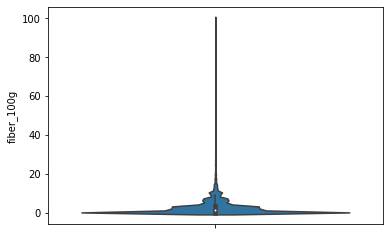

In [327]:
sns.violinplot(y=filt_data["fiber_100g"])
#on peut voir une distribution hétérogène en fibres avec environ 4 groupes ayant des proportions distinctes en fibres  
#je remplace par la moyenne de la categorie de produit

In [328]:
filt_data_gb=round(filt_data.groupby('pnns_groups_1').mean(), 2)
filt_data_gb

additives_n  ingredients_from_palm_oil_n  \
pnns_groups_1                                                       
Beverages                       1.66                         0.00   
Cereals and potatoes            1.01                         0.07   
Composite foods                 2.98                         0.05   
Fat and sauces                  1.61                         0.04   
Fish Meat Eggs                  1.91                         0.00   
Fruits and vegetables           0.66                         0.00   
Milk and dairy products         1.65                         0.02   
Salty snacks                    1.44                         0.08   
Sugary snacks                   2.99                         0.19   
unknown                         1.85                         0.08   

                         ingredients_that_may_be_from_palm_oil_n  energy_100g  \
pnns_groups_1                                                                   
Beverages                                                   0.05       263.41   
Cereals and potatoes                                        0.15      1365.33   
Composite foods                                             0.23       689.59   
Fat and sauces                                              0.16      1604.03   
Fish Meat Eggs                                              0.02       864.29   
Fruits and vegetables                                       0.02       398.39   
Milk and dairy products                                     0.14       822.54   
Salty snacks                                                0.20      2128.10   
Sugary snacks                                               0.24      1820.75   
unknown                                                     0.12      1462.40   

                         fat_100g  saturated-fat_100g  \
pnns_groups_1                                           
Beverages                    0.82                0.50   
Cereals and potatoes         6.15                1.70   
Composite foods              7.62                2.56   
Fat and sauces              38.40               11.38   
Fish Meat Eggs              13.62                4.51   
Fruits and vegetables        2.37                0.78   
Milk and dairy products     13.57                9.13   
Salty snacks                30.79                5.60   
Sugary snacks               19.92                9.95   
unknown                     13.43                5.01   

                         monounsaturated-fat_100g  polyunsaturated-fat_100g  \
pnns_groups_1                                                                 
Beverages                                    0.63                      0.85   
Cereals and potatoes                         5.47                      4.04   
Composite foods                              3.19                      2.20   
Fat and sauces                              41.22                     22.98   
Fish Meat Eggs                               6.38                      3.52   
Fruits and vegetables                        2.56                      1.10   
Milk and dairy products                      2.26                      1.22   
Salty snacks                                20.87                      6.69   
Sugary snacks                                8.48                      2.76   
unknown                                      8.82                      6.03   

                         trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
pnns_groups_1                                                                   
Beverages                          0.00              0.00               12.72   
Cereals and potatoes               0.01              0.00               55.07   
Composite foods                    0.06              0.01               15.43   
Fat and sauces                     0.26              0.01                7.97   
Fish Meat Eggs                     0.03              0.08                2.08   
Fruits and vegetables 

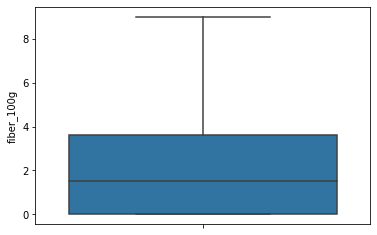

In [329]:
sns.boxplot(y=filt_data["fiber_100g"], showfliers=False)

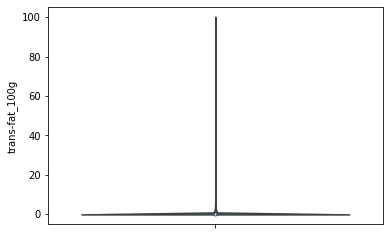

In [330]:
sns.violinplot(y=filt_data["trans-fat_100g"])
#la moyenne par categorie de produits est nulle donc on peut remplacer par zero partout

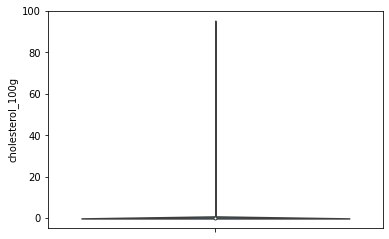

In [331]:
sns.violinplot(y=filt_data["cholesterol_100g"])

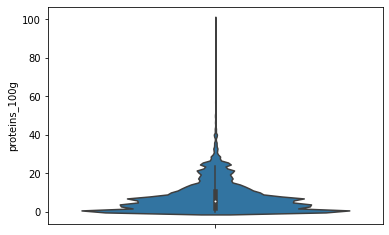

In [332]:
sns.violinplot(y=filt_data["proteins_100g"])

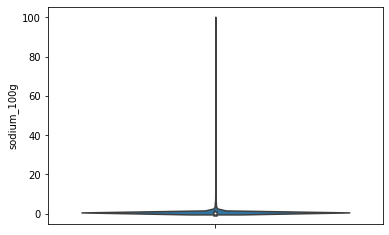

In [333]:
sns.violinplot(y=filt_data["sodium_100g"])

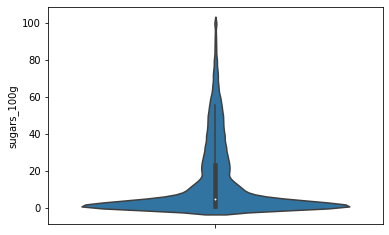

In [334]:
sns.violinplot(y=filt_data["sugars_100g"])

In [335]:
filt_data_pnns=filt_data.groupby('pnns_groups_1')
filt_data_pnns

In [336]:
#On peut compléter par zéro  les trans-fat et le cholestérol 
filt_data['trans-fat_100g'].fillna(0, inplace=True)
filt_data['cholesterol_100g'].fillna(0, inplace=True)
# pour les fibres je complète par la moyenne de la catégorie de pnns



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
dataset_variables_overview(filt_data)

--------------------------------------------------------------------------
Data : ['filt_data']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                                     code        object   221135    1.000000   
0                                      url        object   221135    1.000000   
0                   last_modified_datetime        object   116742    0.527922   
0                             product_name        object   160499    0.725796   
0                             generic_name        object    29460    0.133222   
0                             countries_fr        object      502    0.002270   
0                                 quantity        object     8820    0.039885   
0                                packaging        object    11219    0.050734   
0                                   brands        object    40099    0.181333   
0                               categories        object    25552    0.115549   
0                                   labels        object    13798    0.062396   
0                                   stores        object     2366    0.010699   
0                         ingredients_text        object   165533    0.748561   
0                                allergens        object    11605    0.052479   
0                             serving_size        object    22961    0.103833   
0                              additives_n       float64       32    0.000145   
0                                additives        object   158734    0.717815   
0                           additives_tags        object    34533    0.156163   
0              ingredients_from_palm_oil_n       float64        4    0.000018   
0  ingredients_that_may_be_from_palm_oil_n       float64        8    0.000036   
0                       nutrition_grade_fr        object        5    0.000023   
0                            pnns_groups_1        object       11    0.000050   
0                            pnns_groups_2        object       43    0.000194   
0                                   states        object      512    0.002315   
0                              states_tags        object      512    0.002315   
0                            main_category        object     2020    0.009135   
0                          image_small_url        object    43801    0.198074   
0                              energy_100g       float64     3722    0.016831   
0                                 fat_100g       float64     3257    0.014729   
0                       saturated-fat_100g       float64     2155    0.009745   
0                 monounsaturated-fat_100g       float64     1025    0.004635   
0                 polyunsaturated-fat_100g       float64      900    0.004070   
0                           trans-fat_100g       float64      412    0.001863   
0                         cholesterol_100g       float64      497    0.002247   
0                       carbohydrates_100g       float64     5230    0.023651   
0                              sugars_100g       float64     3935    0.017795   
0                               fiber_100g       float64      973    0.004400   
0                            proteins_100g       float64     2411    0.010903   
0                                salt_100g       float64     4983    0.022534   
0                              sodium_100g       float64     4745    0.021457   
0                           vitamin-a_100g       float64     2194    0.009922   
0                           vitamin-c_100g       float64     1048    0.004739   
0                             calcium_100g       float64      969    0.004382   
0                                iron_100g       float64     1088    0.004920   
0              fruits-vegetables-nuts_100g       float64      320    0.001447   

  Missing  % missing         Mean   Median        Skew       Kurtosis  \
0       0   0.000000                                                    
0       0   0.000000                                                    
0       0   0.000000                                                    
0    2747 

In [338]:
list(filt_data.pnns_groups_1.unique())

[nan,
 'unknown',
 'Fruits and vegetables',
 'Sugary snacks',
 'Composite foods',
 'Beverages',
 'Fish Meat Eggs',
 'Cereals and potatoes',
 'Milk and dairy products',
 'Fat and sauces',
 'Salty snacks']

In [339]:
filt_data['pnns_groups_1']=filt_data.pnns_groups_1.fillna('unknown')
#fillna : remplace nan par unknown
#pour les graph j'enlèverai les pnns "unknown"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [340]:
list(filt_data_gb['fat_100g'])

[0.82, 6.15, 7.62, 38.4, 13.62, 2.37, 13.57, 30.79, 19.92, 13.43]

In [341]:
list(filt_data_gb['carbohydrates_100g'])

[12.72, 55.07, 15.43, 7.97, 2.08, 14.33, 8.88, 45.43, 58.04, 30.01]

In [342]:
list(filt_data_gb['fiber_100g'])

[0.63, 5.4, 2.09, 1.02, 0.67, 3.01, 0.38, 4.76, 3.5, 3.19]

In [343]:
list(filt_data_gb['proteins_100g'])

[0.75, 10.08, 7.63, 1.87, 18.69, 2.28, 9.73, 10.41, 5.52, 7.47]

In [344]:
list(filt_data_gb['sodium_100g'])

[0.05, 0.25, 0.44, 0.73, 0.8, 0.19, 0.26, 0.6, 0.17, 0.73]

In [345]:
list(filt_data_gb['energy_100g'])

[263.41,
 1365.33,
 689.59,
 1604.03,
 864.29,
 398.39,
 822.54,
 2128.1,
 1820.75,
 1462.4]

In [346]:
list_pnn=list(filt_data_gb.index)

Traitement des données manquantes par la moyenne de la catégorie de produits

In [347]:
# je complète les macronutriments par la moyenne de la catégorie de produits correspondante
# pour cela je crée un double dictionnaire ("Nested Dictionaries")
dict_pnns= {'Beverages': { "fat_100g": 0.82,"carbohydrates_100g": 12.72, "fiber_100g":0.4, "energy_100g":263.41   , "proteins_100g":0.75 ,"sodium_100g": 0.05 },
    'Cereals and potatoes' : { "fat_100g": 6.15,"carbohydrates_100g":55.07, "fiber_100g":4.62, "energy_100g":1365.33 , "proteins_100g":10.08  ,"sodium_100g":0.25 },
    'Composite foods': { "fat_100g" : 7.62,"carbohydrates_100g":15.43, "fiber_100g":1.43, "energy_100g":689.59 , "proteins_100g":7.63  ,"sodium_100g":0.44 },
    'Fat and sauces': { "fat_100g":38.4,"carbohydrates_100g":  7.97, "fiber_100g":0.55, "energy_100g": 1604.03 , "proteins_100g":1.87  ,"sodium_100g":0.73 },
    'Fish Meat Eggs': { "fat_100g":13.62,"carbohydrates_100g":2.08, "fiber_100g":0.3, "energy_100g": 864.29, "proteins_100g":18.69  ,"sodium_100g":0.8 },
    'Fruits and vegetables':{ "fat_100g":2.37,"carbohydrates_100g": 14.33, "fiber_100g":2.44, "energy_100g":398.39, "proteins_100g":2.28 ,"sodium_100g":0.19 },
    'Milk and dairy products':{ "fat_100g":13.57,"carbohydrates_100g":8.88, "fiber_100g":0.17, "energy_100g": 822.54 , "proteins_100g":9.73  ,"sodium_100g":0.26 },
    'Salty snacks': { "fat_100g":30.79,"carbohydrates_100g":45.43, "fiber_100g":3.48, "energy_100g":2128.1 , "proteins_100g":10.41  ,"sodium_100g":0.6 },
    'Sugary snacks': { "fat_100g":19.92,"carbohydrates_100g": 58.04, "fiber_100g":2.16, "energy_100g": 1820.75, "proteins_100g":5.52  ,"sodium_100g":0.17 },
    'unknown': { "fat_100g": 13.31,"carbohydrates_100g":34.99, "fiber_100g":2.67, "energy_100g":1223.85, "proteins_100g":7.86  ,"sodium_100g":0.55 }
    }
dict_values_pnns=dict(dict_pnns) #création du dictionnaire


In [348]:
dict_values_pnns=dict(dict_pnns) #création du dictionnaire
list_var=["fat_100g","carbohydrates_100g", "fiber_100g", "energy_100g", "proteins_100g", "sodium_100g"]


In [349]:
def fill_values(pnns, macronu):
  return dict_values_pnns[pnns][macronu] # on utilise les clés pour arriver à la valeur 

In [350]:
for element in list_var:
  filt_data[element]=filt_data[element].fillna(filt_data.apply(lambda x:fill_values(x['pnns_groups_1'], element), axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [351]:
filt_data[list_var].describe()

fat_100g  carbohydrates_100g     fiber_100g   energy_100g  \
count  221135.000000       221135.000000  221135.000000  2.211350e+05   
mean       13.337667           33.237558       2.665055  1.196143e+03   
std        15.512619           27.286005       4.238157  6.987771e+03   
min         0.000000            0.000000       0.000000  0.000000e+00   
25%         1.100000            7.900000       0.000000  4.520000e+02   
50%         8.930000           28.360000       1.500000  1.196000e+03   
75%        20.200000           57.140000       3.480000  1.715000e+03   
max       100.000000          100.000000     100.000000  3.251373e+06   

       proteins_100g    sodium_100g  
count  221135.000000  221135.000000  
mean        7.772901       0.503331  
std         8.073796       1.941648  
min         0.000000       0.000000  
25%         1.900000       0.039370  
50%         5.700000       0.255906  
75%        10.710000       0.536000  
max       100.000000     100.000000

In [352]:
data_set_overview(filt_data)

--------------------------------------------------------------------------
Data : ['filt_data']
Nombre de variables (colonnes) : 45
Nombre d observations (lignes) : 221135
Données manquantes en % : 29.97%
Lignes en double : 0
Lignes en double en % : 0.00%


# PARTIE 3 : Exploitation des données 

## Création de variables  

 Une variable qui compte le nb d'ingrédients 
 (pandas split :séparer les éléments de la liste par le délimitateur)


In [353]:
filt_data['Nb_ingredients']=filt_data['ingredients_text'].map(lambda x: len(str(x).split(",")))
#x=ingredients_text
#"map" methode pour appliquer une fonction 
#lambda: pour faire une fonction en une ligne

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [354]:
filt_data.Nb_ingredients.describe()

count    221135.000000
mean         10.233776
std           9.387080
min           1.000000
25%           3.000000
50%           9.000000
75%          14.000000
max         169.000000
Name: Nb_ingredients, dtype: float64

In [355]:
# Nous avons l'ensemble des sucres ("carbohydrates"), les sucres ajoutés "sugars", je fais la différence pour avoir les sucres restants
filt_data["other_sugars_100g"]=filt_data["carbohydrates_100g"]-filt_data['sugars_100g']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [356]:
filt_data["other_sugars_100g"].clip(lower=0, upper=100, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [357]:
filt_data["other_sugars_100g"].describe()

count    220945.000000
mean         18.515639
std          21.265658
min           0.000000
25%           1.600000
50%           9.370000
75%          31.000000
max         100.000000
Name: other_sugars_100g, dtype: float64

In [358]:
filt_data=filt_data[['code', 'url', 'product_name', 'generic_name',
       'countries_fr', 'quantity', 'packaging', 'brands', 'categories',
       'labels', 'stores', 'ingredients_text', 'allergens', 'serving_size',
       'additives_n', 'additives', 'additives_tags',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags',
       'main_category', 'image_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'other_sugars_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts_100g',
       'Nb_ingredients']]

## Filtrage des variables (complétude des données et corrélation) 

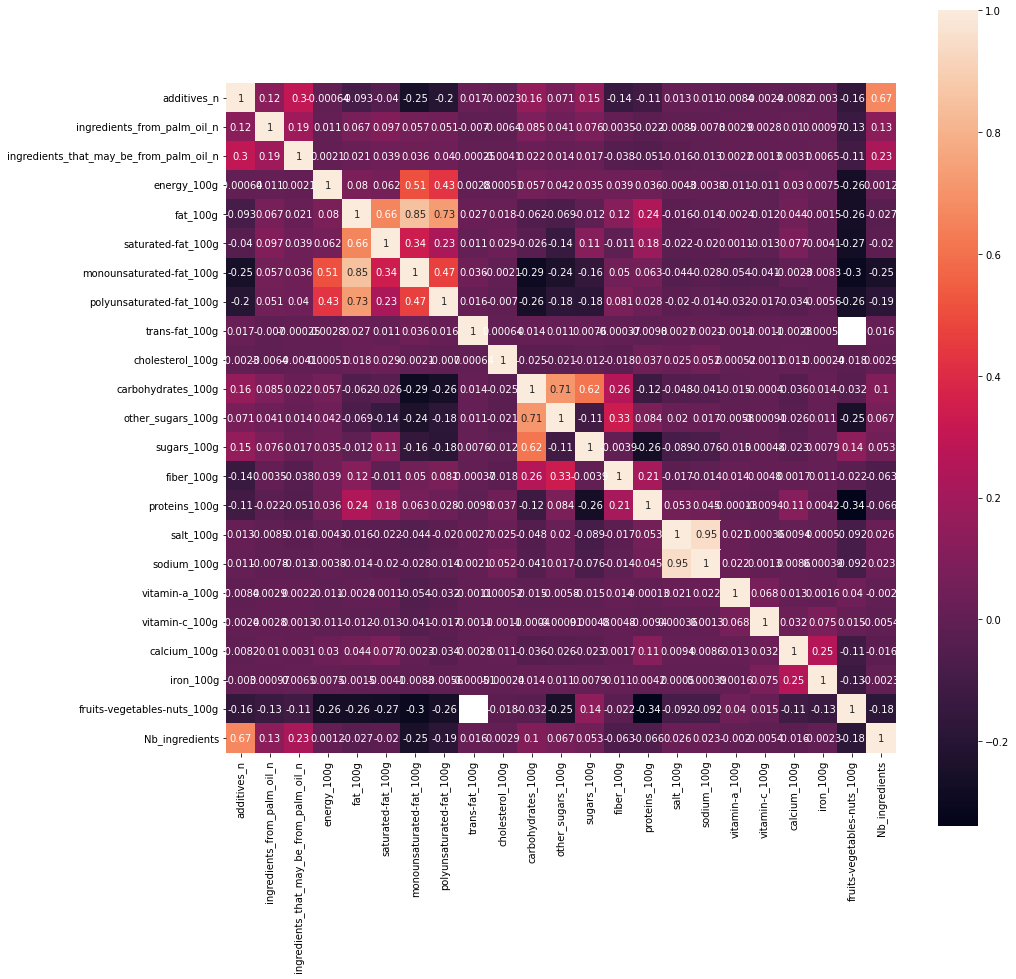

In [359]:
# Matrice des corrélations 
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(filt_data.corr(),annot = True, square=True)

Des corrélations attendues: 
 "Fat", "saturated fat", "(poly)unstaurated_fat", de même entre "carbohydrates", "sugars" et "other sugars". On garde le plus important en nutrition-santé : taux d'acides gras saturés et les sucres. 
Une corrélation interessante entre nb d'ingrédients et nb d'additifs (j'élimine les additifs car complétion faible. 


In [360]:
dataset=filt_data[['code',
 'product_name',
 'generic_name',
 'brands',
 'categories',
 'countries_fr',
 'labels',
 'allergens',
 'serving_size',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'states',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
'Nb_ingredients']]

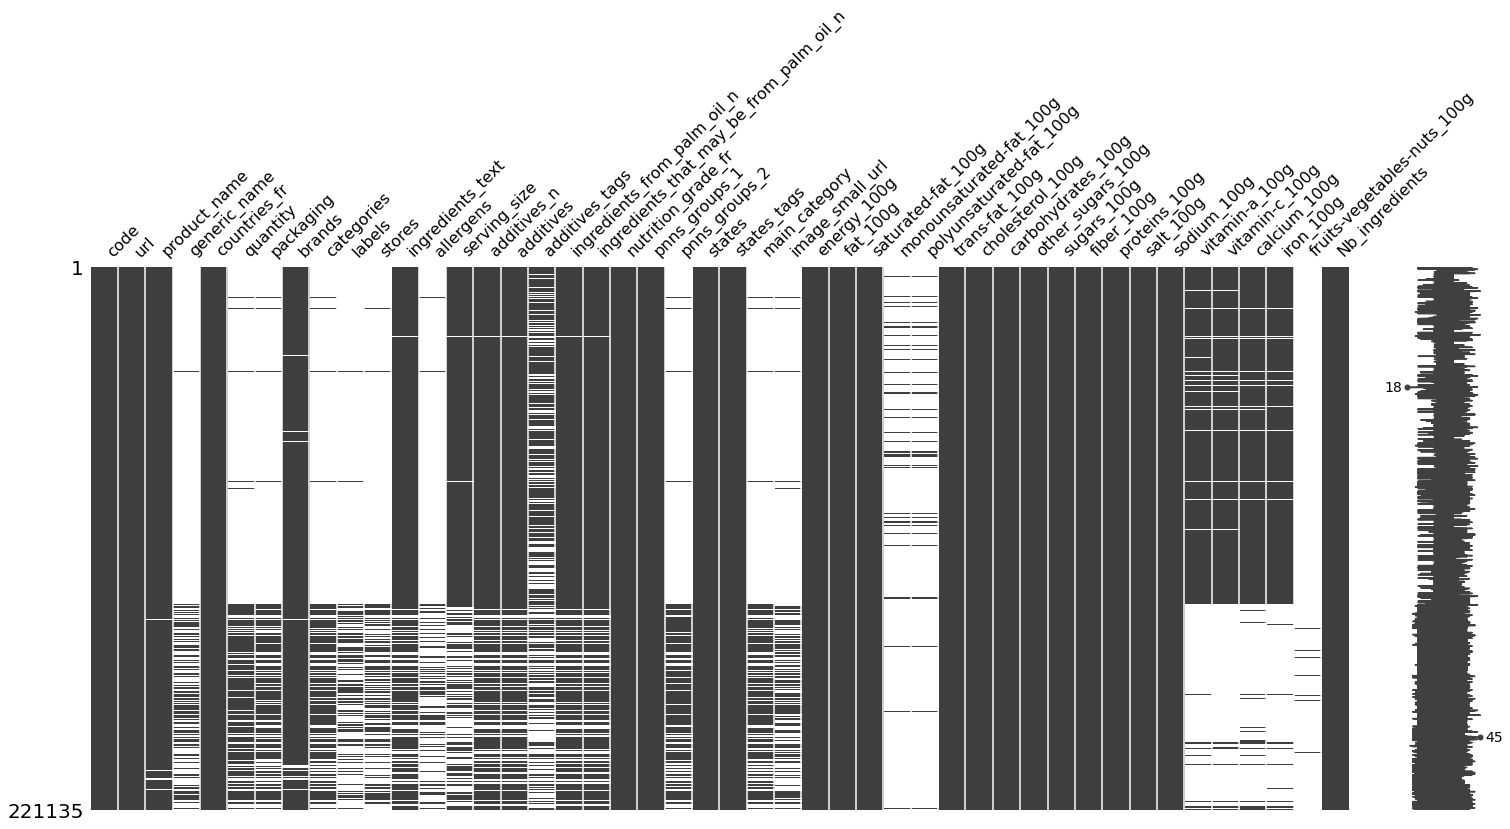

In [361]:
msno.matrix(filt_data)

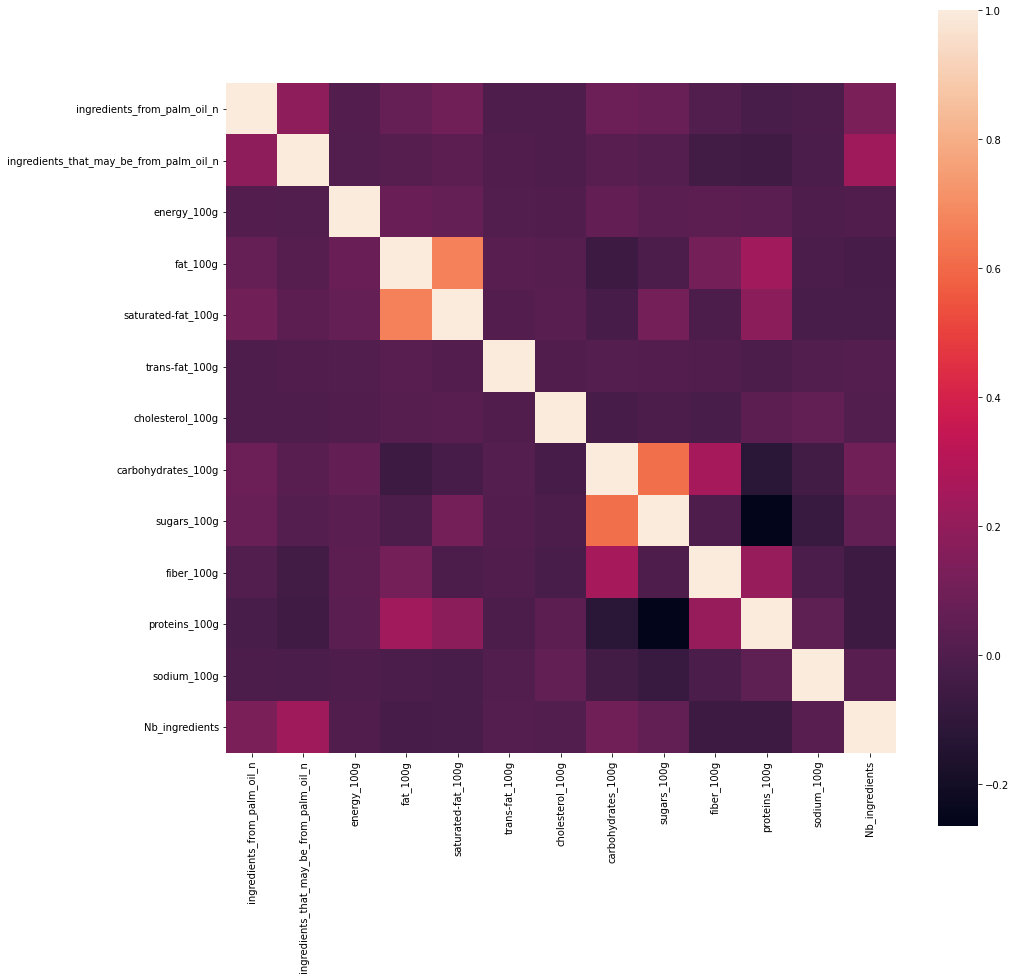

In [362]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(dataset.corr(),annot = False, square=True)

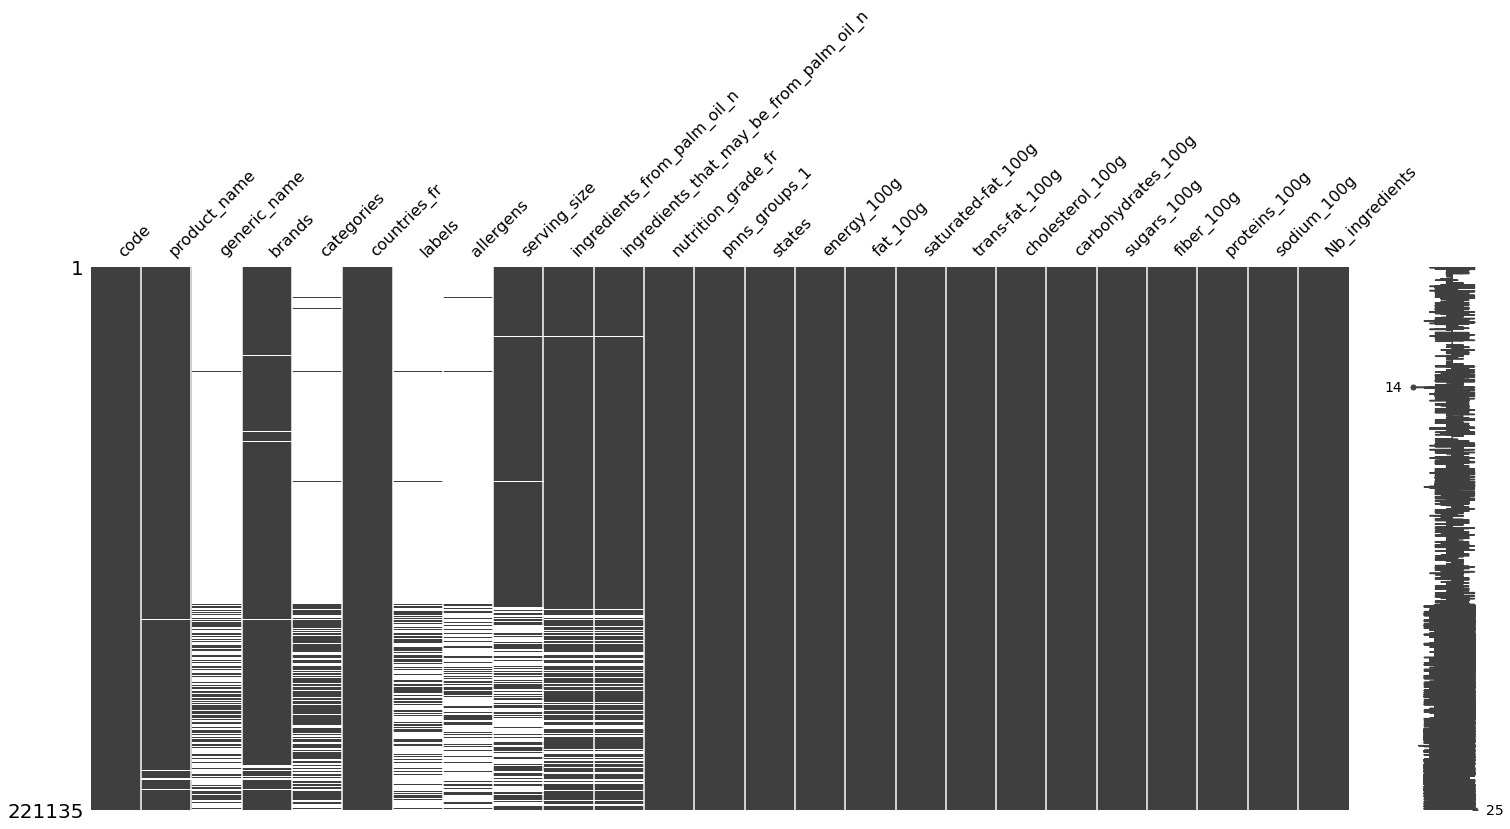

In [363]:
msno.matrix(dataset)

In [364]:
#drop les colonnes vides avec seuil complétion=80% : me permet de conserver les variables exploitables
column_with_nan = dataset.columns[dataset.isnull().any()]
for column in column_with_nan:
  if dataset[column].isnull().sum()*100.0/len(dataset) > 20:
    dataset.drop(column,1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [365]:
dataset.shape

(221135, 20)

In [366]:
data_set_overview(dataset)

--------------------------------------------------------------------------
Data : ['dataset']
Nombre de variables (colonnes) : 20
Nombre d observations (lignes) : 221135
Données manquantes en % : 1.31%
Lignes en double : 0
Lignes en double en % : 0.00%


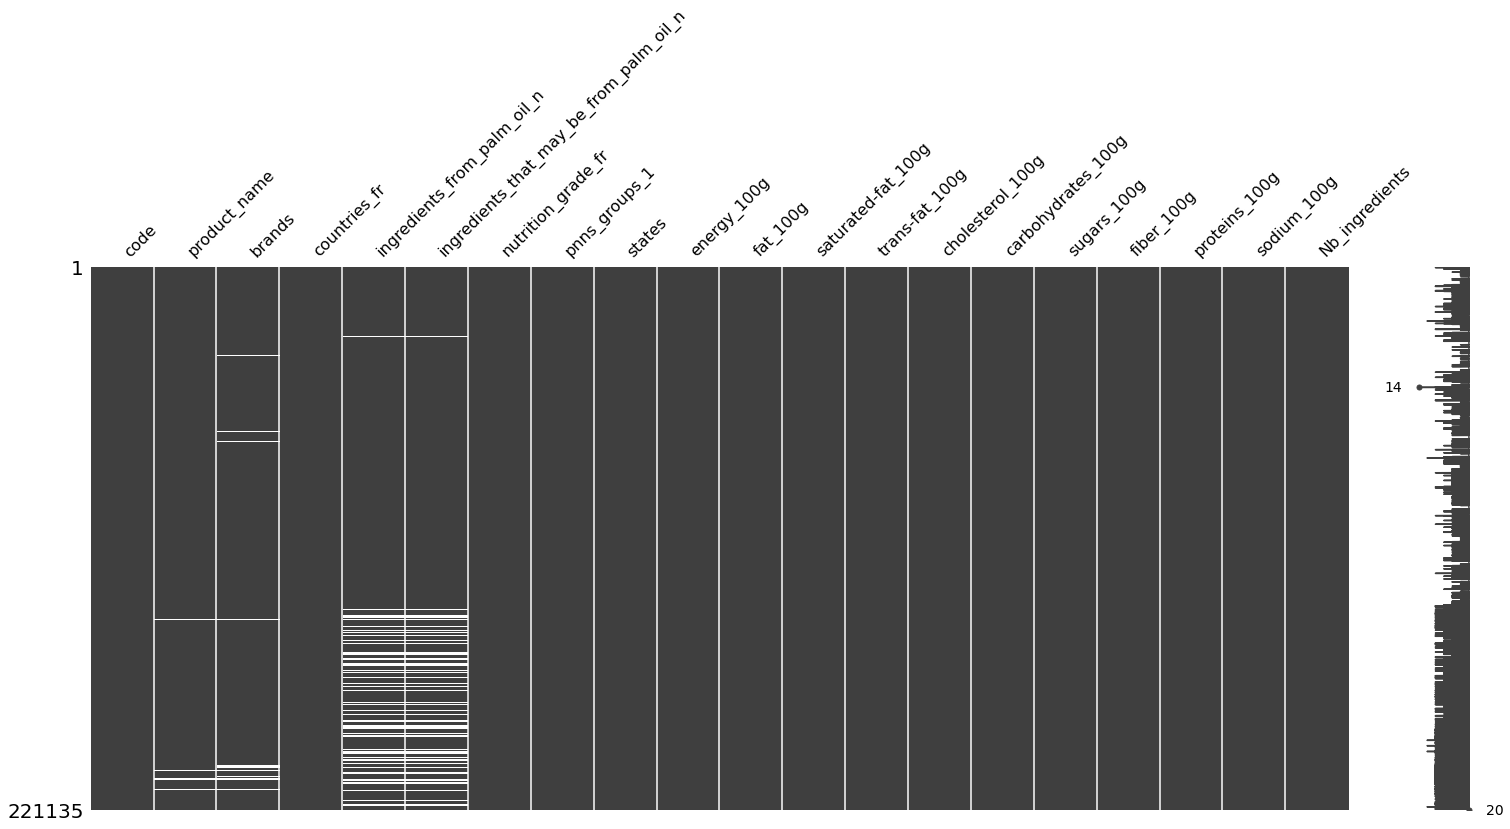

In [367]:
msno.matrix(dataset)

# Visualisation

In [368]:
data_set_overview(dataset)

--------------------------------------------------------------------------
Data : ['dataset']
Nombre de variables (colonnes) : 20
Nombre d observations (lignes) : 221135
Données manquantes en % : 1.31%
Lignes en double : 0
Lignes en double en % : 0.00%


In [369]:
dataset_variables_overview(dataset)

--------------------------------------------------------------------------
Data : ['dataset']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct  \
0                                     code        object   221135    1.000000   
0                             product_name        object   160499    0.725796   
0                                   brands        object    40099    0.181333   
0                             countries_fr        object      502    0.002270   
0              ingredients_from_palm_oil_n       float64        4    0.000018   
0  ingredients_that_may_be_from_palm_oil_n       float64        8    0.000036   
0                       nutrition_grade_fr        object        5    0.000023   
0                            pnns_groups_1        object       10    0.000045   
0                                   states        object      512    0.002315   
0                              energy_100g       float64     3731    0.016872   
0                                 fat_100g       float64     3260    0.014742   
0                       saturated-fat_100g       float64     2155    0.009745   
0                           trans-fat_100g       float64      412    0.001863   
0                         cholesterol_100g       float64      497    0.002247   
0                       carbohydrates_100g       float64     5232    0.023660   
0                              sugars_100g       float64     3935    0.017795   
0                               fiber_100g       float64      974    0.004405   
0                            proteins_100g       float64     2412    0.010907   
0                              sodium_100g       float64     4744    0.021453   
0                           Nb_ingredients         int64      122    0.000552   

  Missing  % missing         Mean    Median        Skew       Kurtosis  \
0       0   0.000000                                                     
0    2747   0.012422                                                     
0    4638   0.020974                                                     
0      57   0.000258                                                     
0   25031   0.113193     0.021876       0.0     6.77175      45.884779   
0   25031   0.113193     0.057327       0.0     5.88758      43.863535   
0       0   0.000000                                                     
0       0   0.000000                                                     
0       0   0.000000                                                     
0       0   0.000000  1196.142882    1196.0  455.306909  211660.206265   
0       0   0.000000    13.337667      8.93    1.886887       5.072125   
0     190   0.000859     4.966966      1.79    3.230655      19.698627   
0       0   0.000000     0.041821       0.0   64.930781    6148.835632   
0       0   0.000000     0.011931       0.0  274.498361   79460.210158   
0       0   0.000000    33.237558     28.36    0.472245      -1.042596   
0     190   0.000859    15.007854       5.0    1.659439       2.260197   
0       0   0.000000     2.665055       1.5    5.269186      56.238353   
0       0   0.000000     7.772901       5.7    2.012443       7.694208   
0       0   0.000000     0.503331  0.255906   24.222218     906.969354   
0       0   0.000000    10.233776       9.0    2.245543      10.284972   

         Variance        Stdev  min      25%       50%     75%        max  
0                                                                          
0                                                                          
0                                                                          
0                                                                          
0        0.021908     0.148012  0.0      0.0       0.0     0.0        2.0  
0        0.075784     0.275289  0.0      0.0       0.0     0.0        6.0  
0                                                                          
0                                                                          
0                                                                          
0  48828721.

In [370]:
dataset.shape

(221135, 20)

## Analyse univariée

In [371]:
dataset["nutrition_grade_fr"].value_counts()


d    62732
c    45528
e    43013
a    35627
b    34235
Name: nutrition_grade_fr, dtype: int64

In [372]:
values_pnns_2=[11206,4520,3873,3305,3211,2951, 2606, 2559, 2517, 2405, 1876, 1817, 1805, 1712, 1592, 1578, 1483, 1266, 1168,
 1146,
 1000,
 692,
 658,
 646,
 625,
 612,
 521,
 449,
 419,
 395,
 366,
 290,
 227,
 152,
 77,
 59,
 48,
 40,
 18]


In [373]:
list_pnns_groups_2= [ 'One-dish meals ','Biscuits and cakes',                 
'Cereals',                          
'Sweets',                               
'Cheese',                               
'Milk and yogurt',                      
'Dressings and sauces',                 
'Chocolate products' ,                  
'Processed meat' ,                      
'Non-sugared beverages' ,               
'Appetizers'  ,                         
'Fish and seafood',                    
'Sweetened beverages'   ,               
'Fruit juices',                         
'Vegetables' ,                          
'Bread' ,                               
'Breakfast cereals' ,                   
'Fats'  ,                               
'Fruits',                               
'Meat',                                 
'Dairy desserts',                       
'Legumes',                            
'vegetables' ,                           
'Sandwich' ,                            
'Ice cream',                             
'Nuts'  ,                              
'Pizza pies and quiche' ,               
'Soups' ,                                
'pastries',                              
'Dried fruits',
'Fruit nectars' ,                       
'Artificially sweetened beverages'  ,    
'Eggs'  ,                               
 'Potatoes',                               
'Alcoholic beverages ' ,                  
'Tripe dishes'  ,                         
'fruits'  ,                               
'Salty and fatty products' ]                                   
#je choisis pnns_groups_1 car seulement 10 catégories et la classification compte autant de produits inconnus 

In [374]:
import plotly.graph_objects as go

labels = list_pnns_groups_2
values = values_pnns_2

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()


In [375]:
dataset["pnns_groups_1"].value_counts()
#je retirerai les unknown pour le graphique (je les garde pour les compléter plus tard ?)


unknown                    170544
Sugary snacks                9996
Milk and dairy products      6861
Cereals and potatoes         6802
Beverages                    5697
Composite foods              5594
Fish Meat Eggs               5362
Fruits and vegetables        4195
Fat and sauces               3727
Salty snacks                 2357
Name: pnns_groups_1, dtype: int64

In [376]:
#pour les graph seulement!
list_pnns=['Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Beverages', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Milk and dairy products',
       'Fat and sauces', 'Salty snacks'] 

dataset_drop=dataset.loc[dataset['pnns_groups_1'].isin(list_pnns)]
#liste sans 'unknown' pour l'analyse :
dataset_drop["pnns_groups_1"].unique()

array(['Fruits and vegetables', 'Sugary snacks', 'Composite foods',
       'Beverages', 'Fish Meat Eggs', 'Cereals and potatoes',
       'Milk and dairy products', 'Fat and sauces', 'Salty snacks'],
      dtype=object)

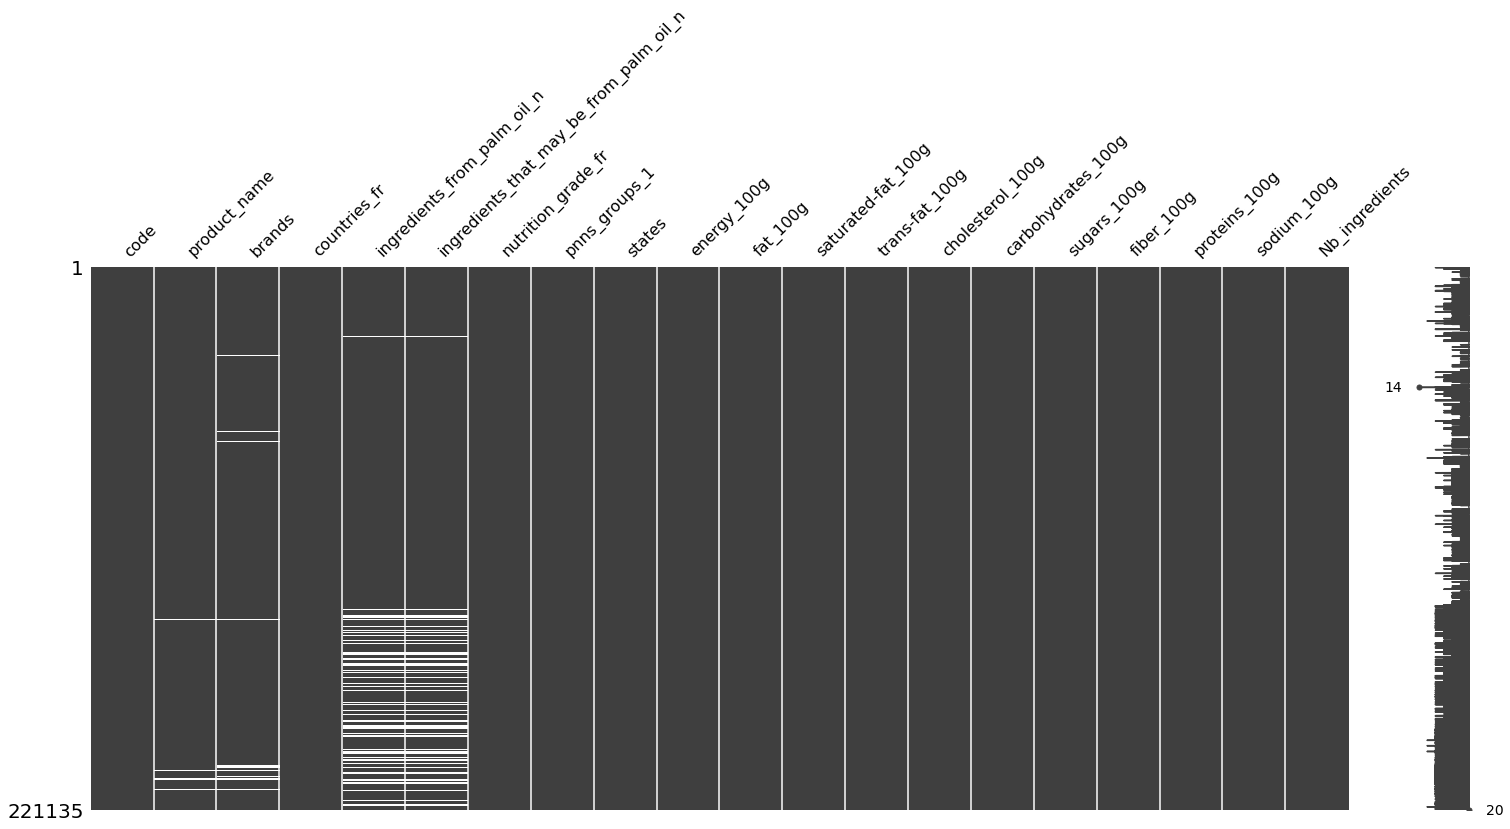

In [377]:
msno.matrix(dataset)

In [378]:
dataset["pnns_groups_1"].value_counts().index.tolist()

['unknown',
 'Sugary snacks',
 'Milk and dairy products',
 'Cereals and potatoes',
 'Beverages',
 'Composite foods',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Fat and sauces',
 'Salty snacks']

In [379]:
dataset["pnns_groups_1"].value_counts().values.tolist()

[170544, 9996, 6861, 6802, 5697, 5594, 5362, 4195, 3727, 2357]

In [380]:
dataset["pnns_groups_1"].unique().tolist()

['unknown',
 'Fruits and vegetables',
 'Sugary snacks',
 'Composite foods',
 'Beverages',
 'Fish Meat Eggs',
 'Cereals and potatoes',
 'Milk and dairy products',
 'Fat and sauces',
 'Salty snacks']

In [381]:
dataset.loc[dataset["pnns_groups_1"]=="unknown"].head()

code                    product_name          brands countries_fr  \
1    4530  Banana Chips Sweetened (Whole)             NaN   États-Unis   
2    4559                         Peanuts  Torn & Glasser   États-Unis   
3   16087          Organic Salted Nut Mix       Grizzlies   États-Unis   
7   16124                  Organic Muesli  Daddy's Muesli   États-Unis   
12  16872                   Zen Party Mix        Sunridge   États-Unis   

    ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
7                           0.0                                      0.0   
12                          0.0                                      0.0   

   nutrition_grade_fr pnns_groups_1  \
1                   d       unknown   
2                   b       unknown   
3                   d       unknown   
7                   c       unknown   
12                  d       unknown   

                                               states  energy_100g  fat_100g  \
1   en:to-be-completed, en:nutrition-facts-complet...       2243.0     28.57   
2   en:to-be-completed, en:nutrition-facts-complet...       1941.0     17.86   
3   en:to-be-completed, en:nutrition-facts-complet...       2540.0     57.14   
7   en:to-be-completed, en:nutrition-facts-complet...       1833.0     18.75   
12  en:to-be-completed, en:nutrition-facts-complet...       2230.0     36.67   

    saturated-fat_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
1                28.57             0.0             0.018               64.29   
2                 0.00             0.0             0.000               60.71   
3                 5.36             0.0             0.000               17.86   
7                 4.69             0.0             0.000               57.81   
12                5.00             0.0             0.000               36.67   

    sugars_100g  fiber_100g  proteins_100g  sodium_100g  Nb_ingredients  
1         14.29         3.6           3.57        0.000               4  
2         17.86         7.1          17.86        0.250              13  
3          3.57         7.1          17.86        0.482               5  
7         15.62         9.4          14.06        0.055              31  
12         3.33         6.7          16.67        0.633              25

In [382]:
dataset_drop=dataset.loc[dataset['pnns_groups_1'].isin(list_pnns)]
#liste sans 'unknown' pour l'analyse :
dataset_drop["pnns_groups_1"].unique()

array(['Fruits and vegetables', 'Sugary snacks', 'Composite foods',
       'Beverages', 'Fish Meat Eggs', 'Cereals and potatoes',
       'Milk and dairy products', 'Fat and sauces', 'Salty snacks'],
      dtype=object)

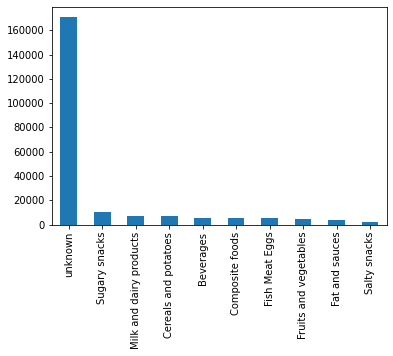

In [383]:
dataset["pnns_groups_1"].value_counts().plot(kind='bar')
plt.show()

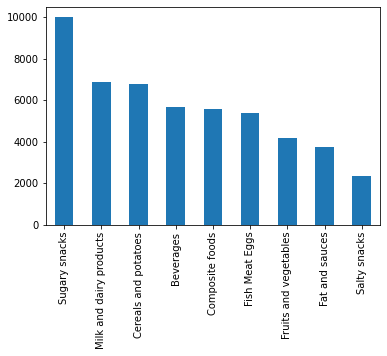

In [384]:
dataset_drop["pnns_groups_1"].value_counts().plot(kind='bar')
plt.show()

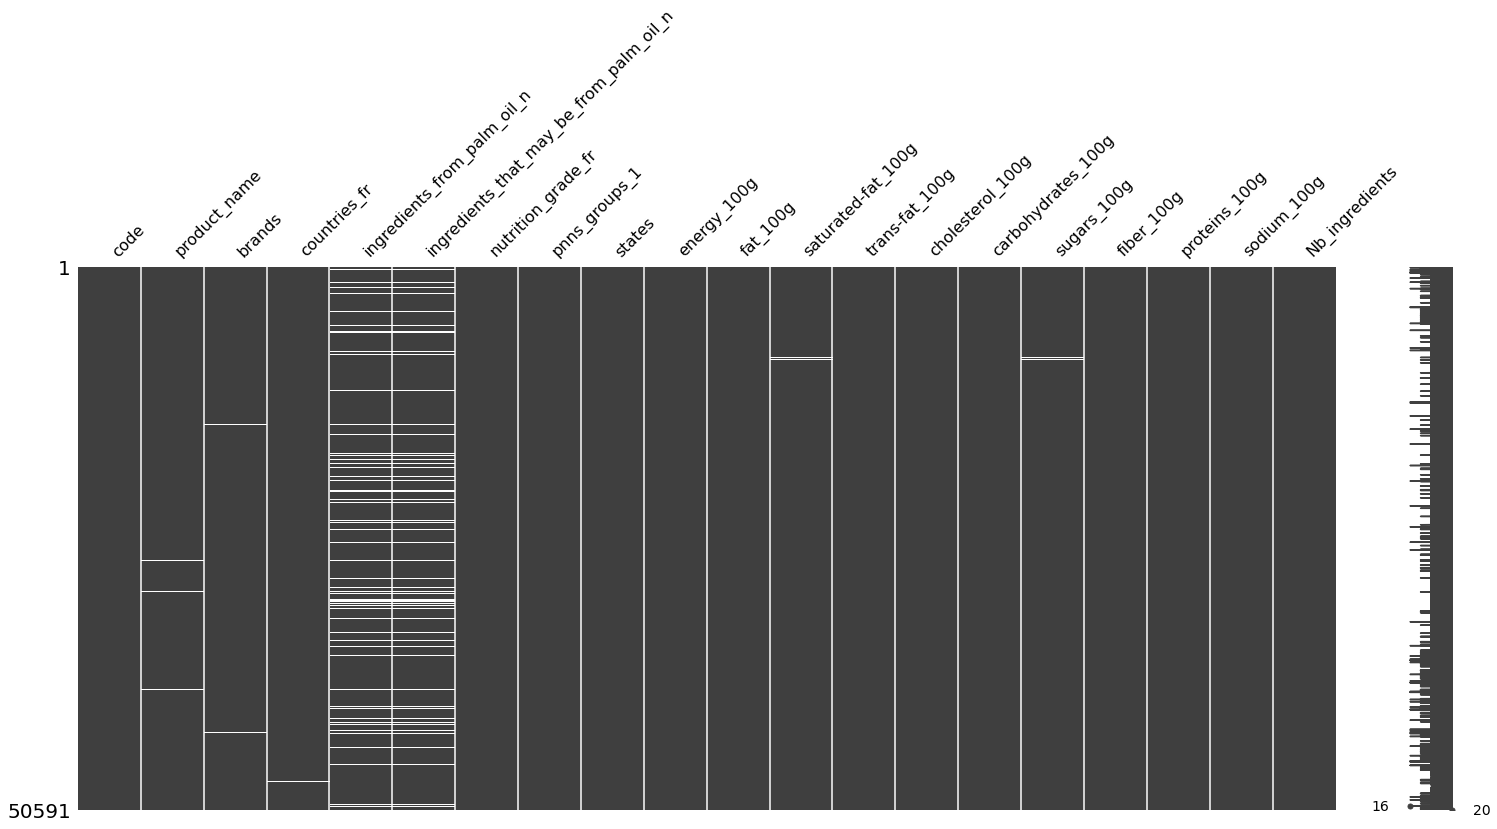

In [385]:
msno.matrix(dataset_drop)
#la copie de dataset où les produits non classés (pnns="unknown" ou 'nan') sont retirés data_set_overview(dataset_drop)

In [386]:
data_set_overview(dataset_drop)

--------------------------------------------------------------------------
Data : ['dataset_drop']
Nombre de variables (colonnes) : 20
Nombre d observations (lignes) : 50591
Données manquantes en % : 1.10%
Lignes en double : 0
Lignes en double en % : 0.00%


In [387]:
dataset.loc[dataset["pnns_groups_1"]=="Fruits and vegetables"].head()

code                    product_name              brands  \
174        290616                    Salade Cesar  Kirkland Signature   
564         31858    Pur Soup' Velouté de légumes              Liebig   
630         54379       Pineapple slices in juice         Sainsbury's   
3207  11110802354                 cut green beans              Kroger   
3357  11110815330  Diced tomatoes in tomato juice              Kroger   

     countries_fr  ingredients_from_palm_oil_n  \
174        Canada                          0.0   
564        France                          0.0   
630   Royaume-Uni                          NaN   
3207   États-Unis                          0.0   
3357   États-Unis                          0.0   

      ingredients_that_may_be_from_palm_oil_n nutrition_grade_fr  \
174                                       0.0                  c   
564                                       1.0                  b   
630                                       NaN                  a   
3207                                      0.0                  a   
3357                                      0.0                  a   

              pnns_groups_1  \
174   Fruits and vegetables   
564   Fruits and vegetables   
630   Fruits and vegetables   
3207  Fruits and vegetables   
3357  Fruits and vegetables   

                                                 states  energy_100g  \
174   en:to-be-checked, en:complete, en:nutrition-fa...       1210.0   
564   en:to-be-checked, en:complete, en:nutrition-fa...        188.0   
630   en:to-be-completed, en:nutrition-facts-complet...        235.0   
3207  en:to-be-checked, en:complete, en:nutrition-fa...         70.0   
3357  en:to-be-checked, en:complete, en:nutrition-fa...         86.8   

      fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g  \
174       12.0                 7.0             0.0             0.056   
564        2.1                 0.7             0.0             0.000   
630        0.5                 0.1             0.0             0.000   
3207       0.0                 0.0             0.0             0.000   
3357       0.0                 0.0             0.0             0.000   

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
174                23.00         0.00       2.000         22.000     0.850000   
564                 5.30         2.40       0.800          0.800     0.295276   
630                14.00        11.00       0.500          0.500     0.007874   
3207                3.33         1.67       1.670          0.833     0.333000   
3357                4.13         2.48       0.826          0.826     0.149000   

      Nb_ingredients  
174                1  
564               17  
630                1  
3207               3  
3357               5

In [388]:
dataset.loc[dataset["pnns_groups_1"]=="unknown"].head(10)
#classifier les unknown par la catégorie et pnns_2 est-ce possible ? ou trop de données manquantes? 

code                           product_name          brands countries_fr  \
1    4530         Banana Chips Sweetened (Whole)             NaN   États-Unis   
2    4559                                Peanuts  Torn & Glasser   États-Unis   
3   16087                 Organic Salted Nut Mix       Grizzlies   États-Unis   
7   16124                         Organic Muesli  Daddy's Muesli   États-Unis   
12  16872                          Zen Party Mix        Sunridge   États-Unis   
15  18012                   Cinnamon Nut Granola       Grizzlies   États-Unis   
16  18050                      Organic Hazelnuts       Grizzlies   États-Unis   
19  18227                     Organic Oat Groats             Pcc   États-Unis   
20  18265                       Energy Power Mix        Sunridge   États-Unis   
21  18289  Antioxidant Mix - Berries & Chocolate        Sunridge   États-Unis   

    ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
7                           0.0                                      0.0   
12                          0.0                                      0.0   
15                          0.0                                      0.0   
16                          0.0                                      0.0   
19                          0.0                                      0.0   
20                          0.0                                      0.0   
21                          0.0                                      0.0   

   nutrition_grade_fr pnns_groups_1  \
1                   d       unknown   
2                   b       unknown   
3                   d       unknown   
7                   c       unknown   
12                  d       unknown   
15                  b       unknown   
16                  b       unknown   
19                  a       unknown   
20                  d       unknown   
21                  d       unknown   

                                               states  energy_100g  fat_100g  \
1   en:to-be-completed, en:nutrition-facts-complet...       2243.0     28.57   
2   en:to-be-completed, en:nutrition-facts-complet...       1941.0     17.86   
3   en:to-be-completed, en:nutrition-facts-complet...       2540.0     57.14   
7   en:to-be-completed, en:nutrition-facts-complet...       1833.0     18.75   
12  en:to-be-completed, en:nutrition-facts-complet...       2230.0     36.67   
15  en:to-be-completed, en:nutrition-facts-complet...       1824.0     18.18   
16  en:to-be-completed, en:nutrition-facts-complet...       2632.0     60.71   
19  en:to-be-completed, en:nutrition-facts-complet...       1096.0      5.95   
20  en:to-be-completed, en:nutrition-facts-complet...       1464.0     17.50   
21  en:to-be-completed, en:nutrition-facts-complet...       2092.0     33.33   

    saturated-fat_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
1                28.57             0.0             0.018               64.29   
2                 0.00             0.0             0.000               60.71   
3                 5.36             0.0             0.000               17.86   
7                 4.69             0.0             0.000               57.81   
12                5.00             0.0             0.000               36.67   
15                1.82             0.0             0.000               60.00   
16                3.57             0.0             0.000               17.86   
19                1.19             0.0             0.000               66.67   
20                7.50             0.0             0.000               42.50   
21                6.67             0.0             0.000               46.67   

    sugars_100g  fiber_100g  proteins_100g  sodium_100g  Nb_ingredients  
1         

In [389]:
dataset.pnns_groups_1.unique()


array(['unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Beverages', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Milk and dairy products',
       'Fat and sauces', 'Salty snacks'], dtype=object)

In [390]:
list_pnns=['Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Beverages', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Milk and dairy products',
       'Fat and sauces', 'Salty snacks'] 


In [391]:
dataset_drop["pnns_groups_1"].unique()

array(['Fruits and vegetables', 'Sugary snacks', 'Composite foods',
       'Beverages', 'Fish Meat Eggs', 'Cereals and potatoes',
       'Milk and dairy products', 'Fat and sauces', 'Salty snacks'],
      dtype=object)

In [392]:
dataset["pnns_groups_1"].value_counts()

unknown                    170544
Sugary snacks                9996
Milk and dairy products      6861
Cereals and potatoes         6802
Beverages                    5697
Composite foods              5594
Fish Meat Eggs               5362
Fruits and vegetables        4195
Fat and sauces               3727
Salty snacks                 2357
Name: pnns_groups_1, dtype: int64

In [393]:
values_pnns_1=[ 9996, 6861, 6802, 5697,5594,5362, 4195,3727,2357]
list_pnns_1=['Sugary snacks',                
'Milk and dairy products',     
'Cereals and potatoes',        
'Beverages',                  
'Composite foods',           
'Fish Meat Eggs ',
'Fruits and vegetables  '  ,          
'Fat and sauces '  ,    
'Salty snacks']              

In [394]:
import plotly.graph_objects as go

labels = list_pnns_1
values = values_pnns_1

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,title= "Classification des produits")])
fig.show()

In [395]:
import plotly.express as px

In [396]:
labels = ['A','B','C','D', 'E']
values = [35627.0, 34235.0, 45528.0, 62732.0, 43013.0	]
fig = px.pie( values=values, names=labels, color=labels, color_discrete_map={'A':'rgb(15,133,84)',
                                 'B':'rgb(115,174,72)',
                                 'C':'#FBE426',
                                 'D':'orange',
                                 'E': 'red'}, title="Répartition du grade nutritonnel dans l'ensemble des produits")
fig.show()



In [397]:
#analyse du score sur le df
data_nutriscore=dataset.reset_index().groupby(['nutrition_grade_fr']).describe()
data_nutriscore.head()


index                                              \
                      count           mean           std   min      25%   
nutrition_grade_fr                                                        
a                   35627.0  147197.103713  90135.755173  19.0  70613.0   
b                   34235.0  145814.276997  89674.931230   2.0  68607.5   
c                   45528.0  150551.279015  88694.684332   7.0  75864.5   
d                   62732.0  145454.469601  88554.864336   1.0  71000.5   
e                   43013.0  147561.356148  90548.520467  32.0  71876.0   

                                                  ingredients_from_palm_oil_n  \
                         50%        75%       max                       count   
nutrition_grade_fr                                                              
a                   143677.0  220383.00  320751.0                     32123.0   
b                   140632.0  219921.50  320768.0                     30160.0   
c                   146392.0  221879.25  320763.0                     40222.0   
d                   138574.0  216625.25  320740.0                     55697.0   
e                   140325.0  222901.00  320632.0                     37902.0   

                                                                 \
                        mean       std  min  25%  50%  75%  max   
nutrition_grade_fr                                                
a                   0.002086  0.046968  0.0  0.0  0.0  0.0  2.0   
b                   0.005603  0.074647  0.0  0.0  0.0  0.0  1.0   
c                   0.016856  0.130271  0.0  0.0  0.0  0.0  2.0   
d                   0.027039  0.164725  0.0  0.0  0.0  0.0  2.0   
e                   0.049338  0.218636  0.0  0.0  0.0  0.0  2.0   

                   ingredients_that_may_be_from_palm_oil_n            \
                                                     count      mean   
nutrition_grade_fr                                                     
a                                                  32123.0  0.021573   
b                                                  30160.0  0.039954   
c                                                  40222.0  0.063299   
d                                                  55697.0  0.080543   
e                                                  37902.0  0.060999   

                                                      energy_100g  \
                         std  min  25%  50%  75%  max       count   
nutrition_grade_fr                                                  
a                   0.169975  0.0  0.0  0.0  0.0  3.0     35627.0   
b                   0.218424  0.0  0.0  0.0  0.0  3.0     34235.0   
c                   0.280245  0.0  0.0  0.0  0.0  4.0     45528.0   
d                   0.331395  0.0  0.0  0.0  0.0  5.0     62732.0   
e                   0.287693  0.0  0.0  0.0  0.0  6.0     43013.0   

                                                                            \
                           mean           std  min     25%     50%     75%   
nutrition_grade_fr                                                           
a                    716.832772    561.179937  0.0   244.0   456.0  1393.0   
b                    609.229543  17576.758711  0.0   187.0   325.0   699.0   
c                   1000.600705    778.441307  0.0   438.0   837.0  1536.0   
d                   1478.882819    944.808683  0.0  1046.0  1464.0  1841.0   
e                   1854.900975   1373.979599  0.0  1554.0  1895.0  2192.0   

                              fat_100g                                    \
                          max    count       mean        std  min    25%   
nutrition_grade_fr                                                         
a                      3209.0  35627.0   3.297292   5.141655  0.0   0.10   
b                   3251373.0  34235.0   4.635241   7.617101  0.0   0.00   
c                     69292.0  45528.0  10.147083  13.465244  0.0   0.90   
d                    182

In [398]:
data_nutriscore.head()

index                                              \
                      count           mean           std   min      25%   
nutrition_grade_fr                                                        
a                   35627.0  147197.103713  90135.755173  19.0  70613.0   
b                   34235.0  145814.276997  89674.931230   2.0  68607.5   
c                   45528.0  150551.279015  88694.684332   7.0  75864.5   
d                   62732.0  145454.469601  88554.864336   1.0  71000.5   
e                   43013.0  147561.356148  90548.520467  32.0  71876.0   

                                                  ingredients_from_palm_oil_n  \
                         50%        75%       max                       count   
nutrition_grade_fr                                                              
a                   143677.0  220383.00  320751.0                     32123.0   
b                   140632.0  219921.50  320768.0                     30160.0   
c                   146392.0  221879.25  320763.0                     40222.0   
d                   138574.0  216625.25  320740.0                     55697.0   
e                   140325.0  222901.00  320632.0                     37902.0   

                                                                 \
                        mean       std  min  25%  50%  75%  max   
nutrition_grade_fr                                                
a                   0.002086  0.046968  0.0  0.0  0.0  0.0  2.0   
b                   0.005603  0.074647  0.0  0.0  0.0  0.0  1.0   
c                   0.016856  0.130271  0.0  0.0  0.0  0.0  2.0   
d                   0.027039  0.164725  0.0  0.0  0.0  0.0  2.0   
e                   0.049338  0.218636  0.0  0.0  0.0  0.0  2.0   

                   ingredients_that_may_be_from_palm_oil_n            \
                                                     count      mean   
nutrition_grade_fr                                                     
a                                                  32123.0  0.021573   
b                                                  30160.0  0.039954   
c                                                  40222.0  0.063299   
d                                                  55697.0  0.080543   
e                                                  37902.0  0.060999   

                                                      energy_100g  \
                         std  min  25%  50%  75%  max       count   
nutrition_grade_fr                                                  
a                   0.169975  0.0  0.0  0.0  0.0  3.0     35627.0   
b                   0.218424  0.0  0.0  0.0  0.0  3.0     34235.0   
c                   0.280245  0.0  0.0  0.0  0.0  4.0     45528.0   
d                   0.331395  0.0  0.0  0.0  0.0  5.0     62732.0   
e                   0.287693  0.0  0.0  0.0  0.0  6.0     43013.0   

                                                                            \
                           mean           std  min     25%     50%     75%   
nutrition_grade_fr                                                           
a                    716.832772    561.179937  0.0   244.0   456.0  1393.0   
b                    609.229543  17576.758711  0.0   187.0   325.0   699.0   
c                   1000.600705    778.441307  0.0   438.0   837.0  1536.0   
d                   1478.882819    944.808683  0.0  1046.0  1464.0  1841.0   
e                   1854.900975   1373.979599  0.0  1554.0  1895.0  2192.0   

                              fat_100g                                    \
                          max    count       mean        std  min    25%   
nutrition_grade_fr                                                         
a                      3209.0  35627.0   3.297292   5.141655  0.0   0.10   
b                   3251373.0  34235.0   4.635241   7.617101  0.0   0.00   
c                     69292.0  45528.0  10.147083  13.465244  0.0   0.90   
d                    182

In [399]:
values=dataset['countries_fr'].value_counts()
labels= dataset['countries_fr']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, title="Pays de vente")])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [400]:
import seaborn as sns

In [401]:
dataset['sodium_100g'].median()

0.255905511811024

In [402]:
dataset['sodium_100g'].describe()

count    221135.000000
mean          0.503331
std           1.941648
min           0.000000
25%           0.039370
50%           0.255906
75%           0.536000
max         100.000000
Name: sodium_100g, dtype: float64

In [403]:
dataset['sodium_100g'].skew()
#interprétation : med<mean:asymétrie à gauche () plus de produits moins salé que la valeur moyenne)

24.222218045042567

In [404]:
dataset.sodium_100g.describe()

count    221135.000000
mean          0.503331
std           1.941648
min           0.000000
25%           0.039370
50%           0.255906
75%           0.536000
max         100.000000
Name: sodium_100g, dtype: float64

### Quelle est la distribution des variables ? 

In [405]:
dataset['energy_100g'].var()

48828942.07636453

In [406]:
dataset['energy_100g'].describe()

count    2.211350e+05
mean     1.196143e+03
std      6.987771e+03
min      0.000000e+00
25%      4.520000e+02
50%      1.196000e+03
75%      1.715000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [407]:
#j'applique la méthode IQR pour traiter les outliers de la variable "energy_100g"
lower_range, upper_range=outlier_treatment(dataset['energy_100g'])

In [408]:
data_IQR=dataset[dataset['energy_100g'].between(0, 3609.5)]

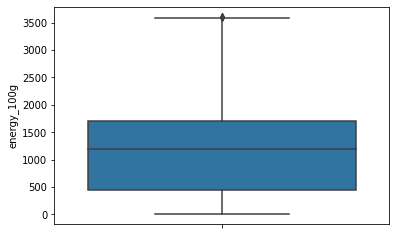

In [409]:
sns.boxplot( y=data_IQR["energy_100g"])

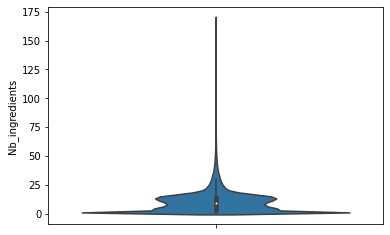

In [410]:
sns.violinplot(y=dataset["Nb_ingredients"])

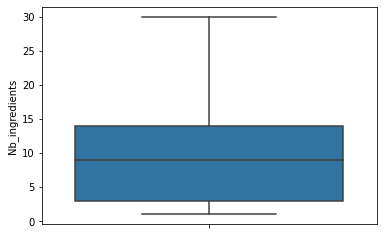

In [411]:
sns.boxplot( y=dataset["Nb_ingredients"], showfliers=False)

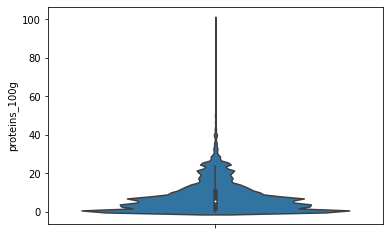

In [412]:
sns.violinplot( y=dataset["proteins_100g"], showfliers=False)

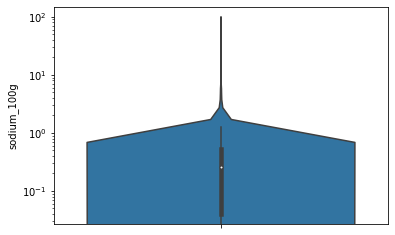

In [413]:
sns.violinplot( y=dataset["sodium_100g"], showfliers=False)
plt.yscale("log")
#la plupart des produits ont très peu de sel et d'autres c'est du sel

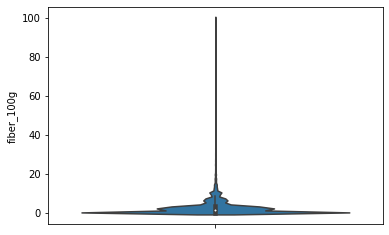

In [414]:
sns.violinplot(y=dataset["fiber_100g"])

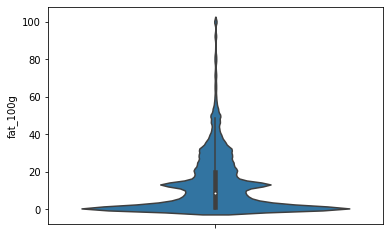

In [415]:
sns.violinplot(y=dataset["fat_100g"])

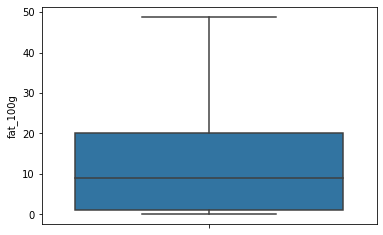

In [416]:
sns.boxplot( y=dataset["fat_100g"], showfliers=False)

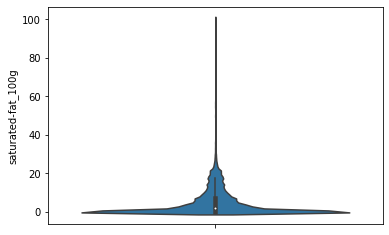

In [417]:
sns.violinplot( y=dataset["saturated-fat_100g"], showfliers=False)

In [418]:
dataset['fiber_100g'].var()

17.96197138957335

In [419]:
dataset['fiber_100g'].describe()

count    221135.000000
mean          2.665055
std           4.238157
min           0.000000
25%           0.000000
50%           1.500000
75%           3.480000
max         100.000000
Name: fiber_100g, dtype: float64

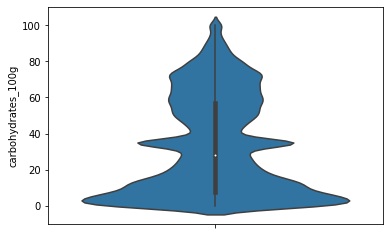

In [420]:
sns.violinplot(y=dataset["carbohydrates_100g"])

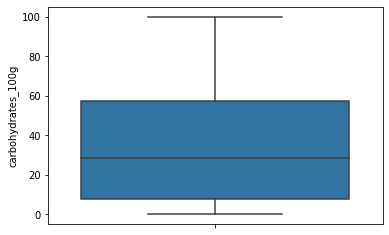

In [421]:
sns.boxplot(y=dataset["carbohydrates_100g"])

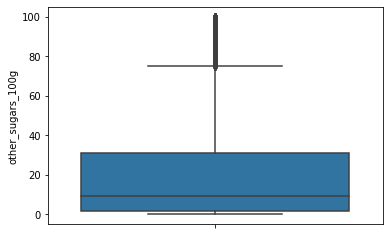

In [422]:
sns.boxplot(y=filt_data["other_sugars_100g"])

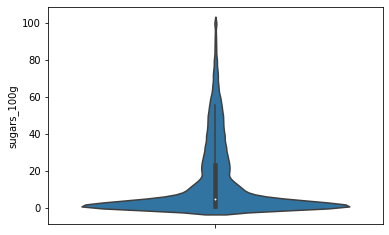

In [423]:
sns.violinplot(y=dataset["sugars_100g"])

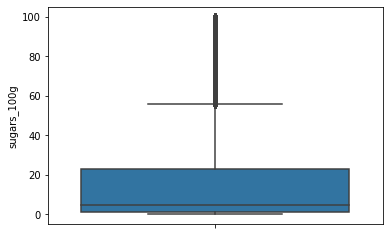

In [424]:
sns.boxplot(y=dataset["sugars_100g"])

### Analyse de variables continues et catégorielles

In [425]:
list(dataset.columns)

['code',
 'product_name',
 'brands',
 'countries_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'states',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'Nb_ingredients']

In [426]:
var_categorielles= dataset[['nutrition_grade_fr','pnns_groups_1', 'ingredients_that_may_be_from_palm_oil_n']]

In [427]:
dataset['nutrition_grade_fr'].value_counts()

d    62732
c    45528
e    43013
a    35627
b    34235
Name: nutrition_grade_fr, dtype: int64

In [428]:
dataset['pnns_groups_1'].value_counts()

unknown                    170544
Sugary snacks                9996
Milk and dairy products      6861
Cereals and potatoes         6802
Beverages                    5697
Composite foods              5594
Fish Meat Eggs               5362
Fruits and vegetables        4195
Fat and sauces               3727
Salty snacks                 2357
Name: pnns_groups_1, dtype: int64

In [429]:
len(dataset['pnns_groups_1'].unique())

10

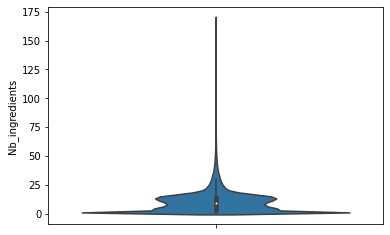

In [430]:
sns.violinplot(y=dataset['Nb_ingredients'])

In [431]:
dataset['Nb_ingredients'].describe()

count    221135.000000
mean         10.233776
std           9.387080
min           1.000000
25%           3.000000
50%           9.000000
75%          14.000000
max         169.000000
Name: Nb_ingredients, dtype: float64

In [432]:
dataset['ingredients_that_may_be_from_palm_oil_n'].unique()

array([ 0., nan,  1.,  2.,  5.,  3.,  4.,  6.])

In [433]:
var_continues= dataset[[ 'energy_100g', 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g']]


In [434]:
def variables_stats(data):
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','Count','Mean', 'Median', 'Variance', 'Stdev', 'min','25%','50%','75%','max'])
    for column in data.columns:
        var_type = data[column].dtypes
        distinct = len(data[column].unique())
        count = (data[column].value_counts()).sum()
        if var_type != 'object':       
            df = df.append(pd.DataFrame([[column,var_type,distinct,count,data[column].mean(),data[column].median(),data[column].var(ddof=0),
                                          data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.5),data[column].quantile(0.75),data[column].max()]], columns=['Variable name','Variable type','Distinct','Count', 'Mean', 'Median', 'Variance', 'Stdev', 'min','25%','50%','75%','max']))
        else: 
            #df = pd.DataFrame(columns=['Variable name','Variable type','Distinct','Count'," ", " ", " ", " ", " ", " ", " ", " ", " "])               
            df = df.append(pd.DataFrame([[column, var_type, distinct, count, " ", " ", " ", " ", " ", " ", " ", " ", " "]]))
    return df

## Analyse graphique multivariée

####Analyse en fonction du grade nutritionnel (A,B,C,D,E)

[Text(0.5, 1.0, 'Répartition de Energie(100g)/ grade nutritionnel')]

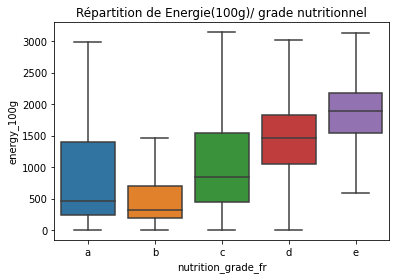

In [435]:
sns.boxplot(data=data_IQR, x="nutrition_grade_fr", y="energy_100g", order=["a", "b", "c", "d", "e"], showfliers=False).set(title='Répartition de Energie(100g)/ grade nutritionnel')

[Text(0.5, 1.0, 'Répartition des sucres_100g en fonction du grade nutritionnel')]

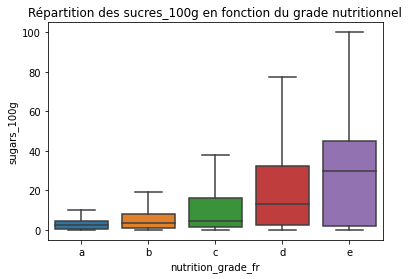

In [436]:
sns.boxplot(data=data_IQR, x="nutrition_grade_fr", y="sugars_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition des sucres_100g en fonction du grade nutritionnel')

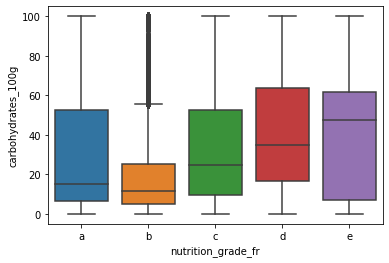

In [437]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="carbohydrates_100g", order=["a", "b", "c", "d", "e"])

la relation entre l'ensemble des sucres (carbohydrates) et le grade nutritionnel est beaucoup moins claire que celle existant entre sucres ajoutés "sugars" et le grade nutritionnel. 

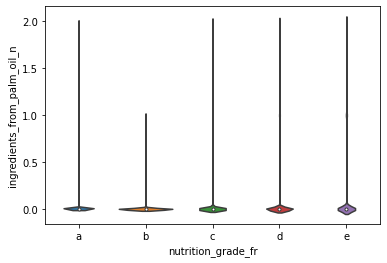

In [438]:
sns.violinplot(data=dataset, x="nutrition_grade_fr", y="ingredients_from_palm_oil_n", order=["a", "b", "c", "d", "e"], showfliers=False)

[Text(0.5, 1.0, 'Répartition du sel_100g en fonction du grade nutritionnel')]

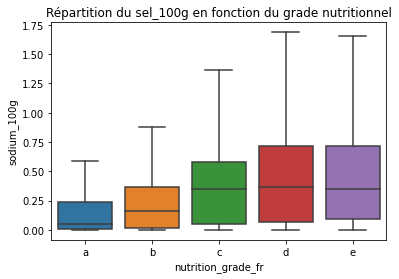

In [439]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="sodium_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition du sel_100g en fonction du grade nutritionnel')

augmentation du sel : mauvais score nutritionnel

[Text(0.5, 1.0, 'Répartition des graisses_100g en fonction du grade nutritionnel')]

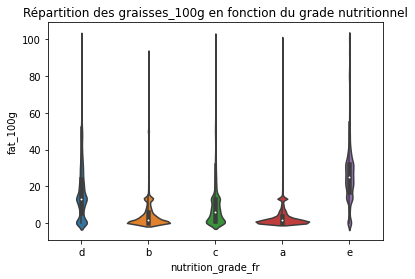

In [440]:
sns.violinplot(data=dataset, x="nutrition_grade_fr", y="fat_100g").set(title='Répartition des graisses_100g en fonction du grade nutritionnel')

[Text(0.5, 1.0, 'Répartition des graisses_100g en fonction du grade nutritionnel')]

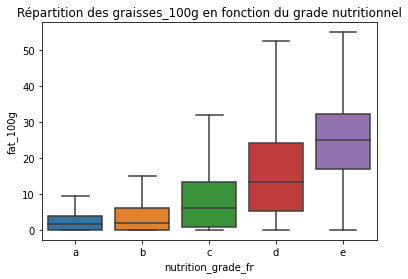

In [441]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="fat_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition des graisses_100g en fonction du grade nutritionnel')

[Text(0.5, 1.0, 'Répartition des graisses saturées_100g en fonction du grade nutritionnel')]

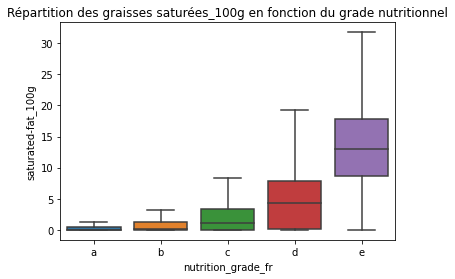

In [442]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="saturated-fat_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition des graisses saturées_100g en fonction du grade nutritionnel')

Le grade nutritionnel représente bien la teneur en graisses saturées 

 Graisses et sucres : relation linéaire avec mauvais grade nutritionnel ? 

[Text(0.5, 1.0, 'Répartition des protéines_100g en fonction du grade nutritionnel')]

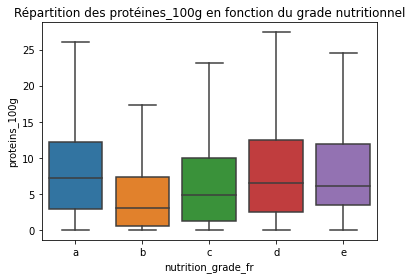

In [443]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="proteins_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition des protéines_100g en fonction du grade nutritionnel')
#sns.boxplot(data=dataset, x="nutrition_grade_fr", y="proteins_100g").set(title='Répartition des protéines_100g en fonction du grade nutritionnel')

[Text(0.5, 1.0, 'Répartition des fibres_100g en fonction du grade nutritionnel')]

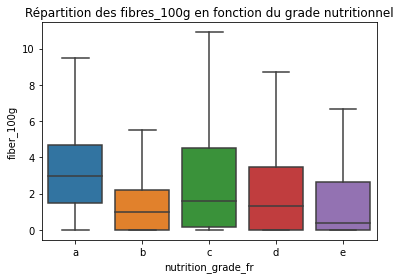

In [444]:

sns.boxplot(data=dataset, x="nutrition_grade_fr", y="fiber_100g", showfliers=False, order=["a", "b", "c", "d", "e"]).set(title='Répartition des fibres_100g en fonction du grade nutritionnel')

In [445]:
dataset.fiber_100g.describe()

count    221135.000000
mean          2.665055
std           4.238157
min           0.000000
25%           0.000000
50%           1.500000
75%           3.480000
max         100.000000
Name: fiber_100g, dtype: float64

Y-at-il une relation entre grade nutritionnel et le nombre d'ingrédients ? 

[Text(0.5, 1.0, 'Nb ingredients en fonction du grade nutritionnel')]

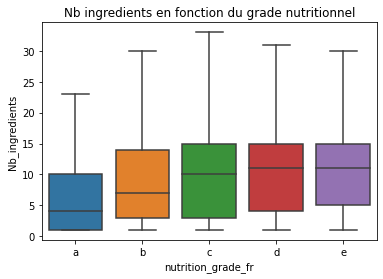

In [446]:
sns.boxplot(data=dataset, x="nutrition_grade_fr", y="Nb_ingredients", order=["a", "b", "c", "d", "e"],showfliers=False).set(title='Nb ingredients en fonction du grade nutritionnel')

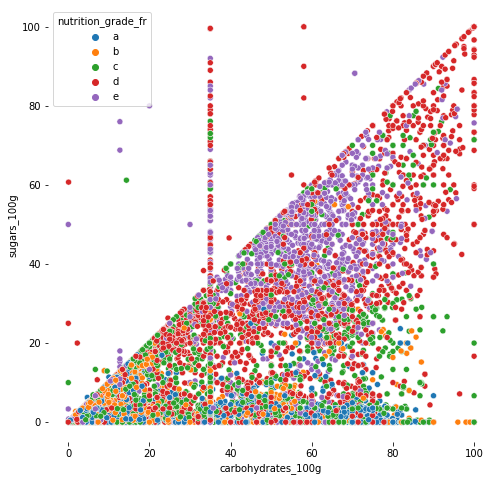

In [447]:
# Répartition des différents sucres en fonction du grade nutritionnel 
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["a", "b", "c", "d", "e"]
sns.scatterplot(x="carbohydrates_100g", y="sugars_100g",
                hue="nutrition_grade_fr", 
                hue_order=clarity_ranking,
                data=dataset.sample(frac=0.05), ax=ax) #echantillonage à 5% car trop de points

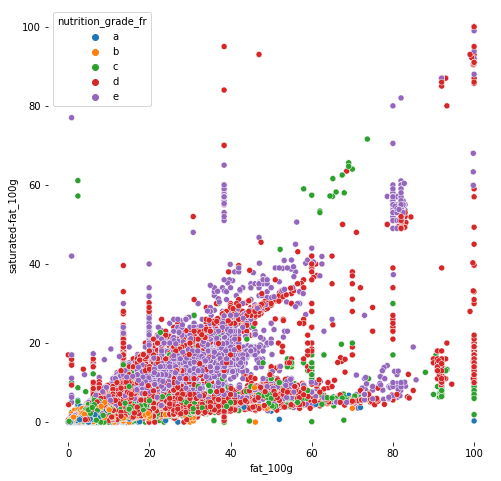

In [448]:
# Répartition des graisses en fonction du grade nutritionnel 
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["a", "b", "c", "d", "e"]
sns.scatterplot(x="fat_100g", y="saturated-fat_100g",
                hue="nutrition_grade_fr", 
                hue_order=clarity_ranking,
                data=dataset_drop, ax=ax)

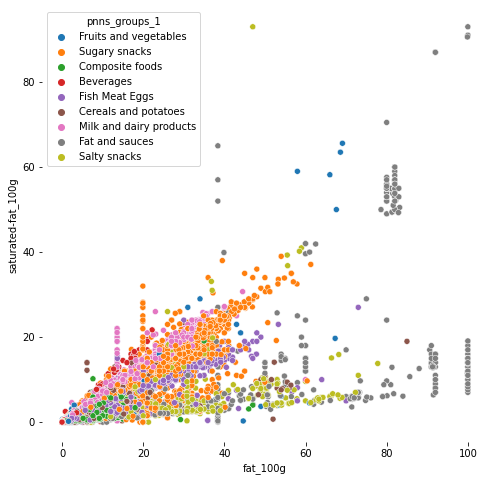

In [449]:
# Répartition des graisses en fonction des pnns
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
clarity_ranking=['Fruits and vegetables', 'Sugary snacks', 'Composite foods', 'Beverages', 'Fish Meat Eggs', 'Cereals and potatoes', 'Milk and dairy products','Fat and sauces', 'Salty snacks']
sns.scatterplot(x="fat_100g", y="saturated-fat_100g",
                hue="pnns_groups_1", 
                hue_order=clarity_ranking,
                data=dataset_drop.sample(frac=0.2), ax=ax)

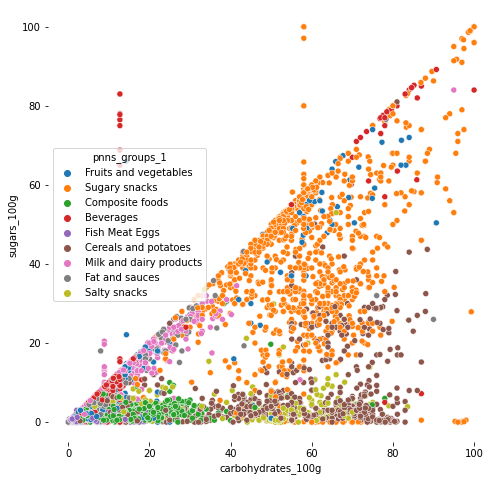

In [450]:
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
clarity_ranking=['Fruits and vegetables', 'Sugary snacks', 'Composite foods', 'Beverages', 'Fish Meat Eggs', 'Cereals and potatoes', 'Milk and dairy products','Fat and sauces', 'Salty snacks']
sns.scatterplot(x="carbohydrates_100g", y="sugars_100g",
                hue="pnns_groups_1", 
                hue_order=clarity_ranking, 
                data=dataset_drop.sample(frac=0.1)) 

#### Analyses en fonction de la classification des produits 
Variable de classification: "pnns_groups_1"

[Text(0.5, 1.0, 'Répartition de Energie(100g)/ dans les différentes classes de produits')]

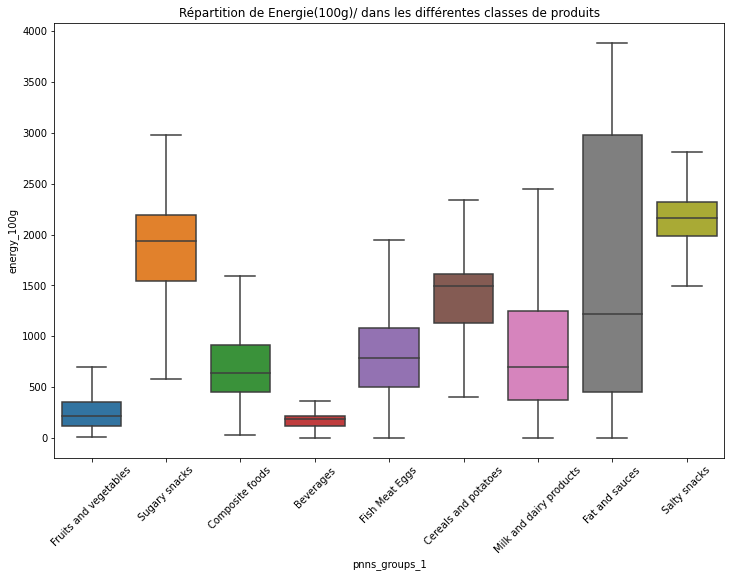

In [451]:
fig = plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data=dataset_drop, x="pnns_groups_1", y="energy_100g", showfliers=False).set(title='Répartition de Energie(100g)/ dans les différentes classes de produits')


l'analyse en fonction des catégories reflète bien la composition macronutriments des produits dans la classification pnns_groups_1

[Text(0.5, 1.0, 'Répartition des graisses(100g) dans les différentes classes de produits')]

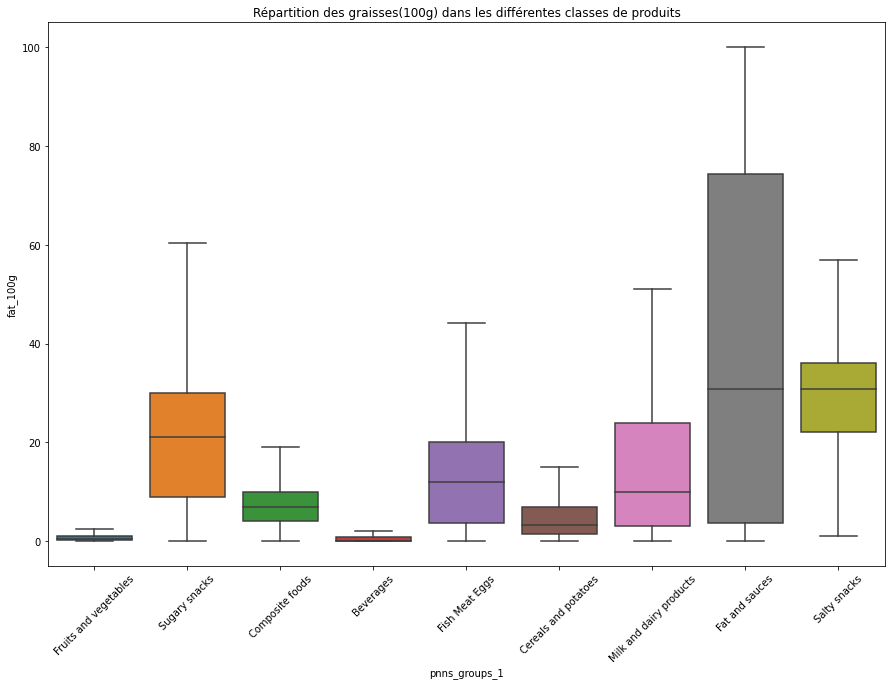

In [452]:
fig = plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.boxplot(data=dataset_drop, x="pnns_groups_1", y="fat_100g", showfliers=False).set(title='Répartition des graisses(100g) dans les différentes classes de produits')


[Text(0.5, 1.0, 'Répartition des sucres(100g) dans les différentes classes de produits')]

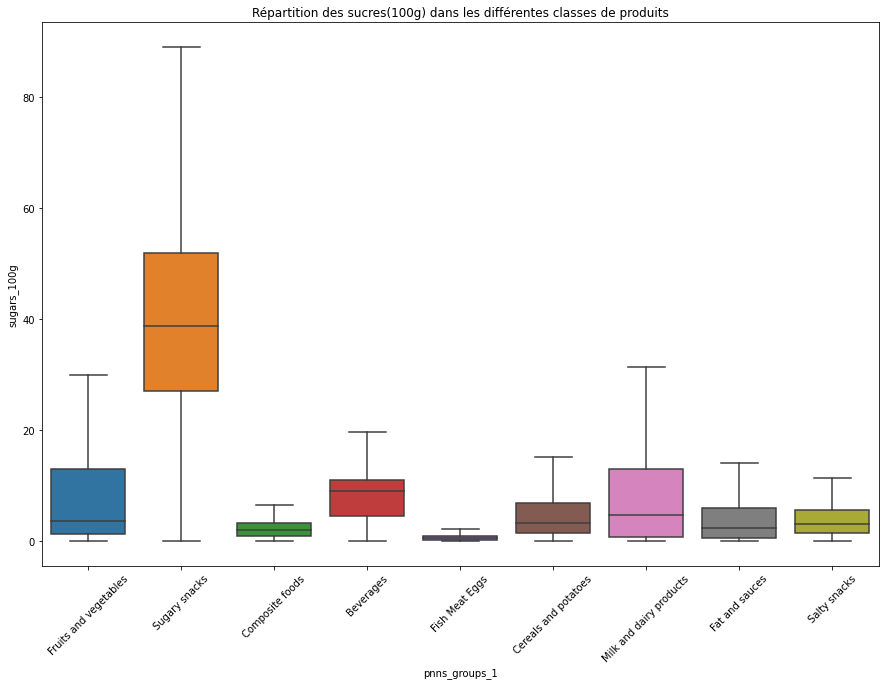

In [453]:
fig = plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.boxplot(data=dataset_drop, x="pnns_groups_1", y="sugars_100g", showfliers=False).set(title='Répartition des sucres(100g) dans les différentes classes de produits')


[Text(0.5, 1.0, 'Répartition des protéines(100g) dans les différentes classes de produits')]

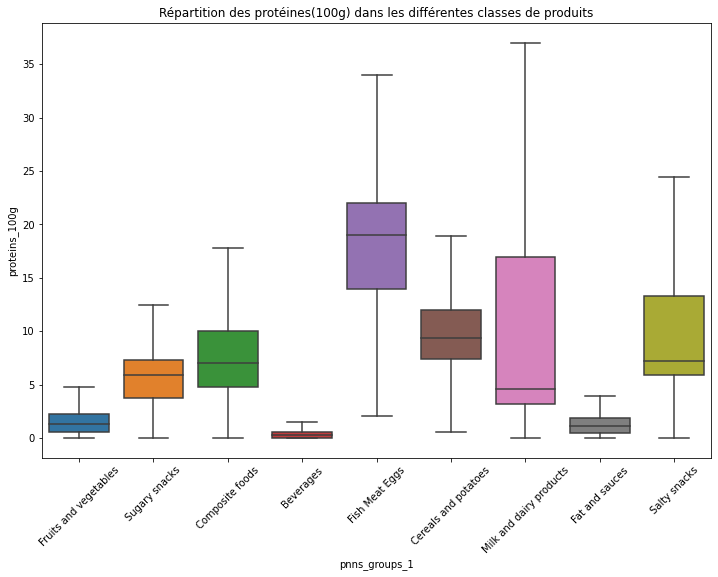

In [454]:
fig = plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data=dataset_drop, x="pnns_groups_1", y="proteins_100g", showfliers=False).set(title='Répartition des protéines(100g) dans les différentes classes de produits')


[Text(0.5, 1.0, 'Répartition des protéines(100g) dans les différentes classes de produits')]

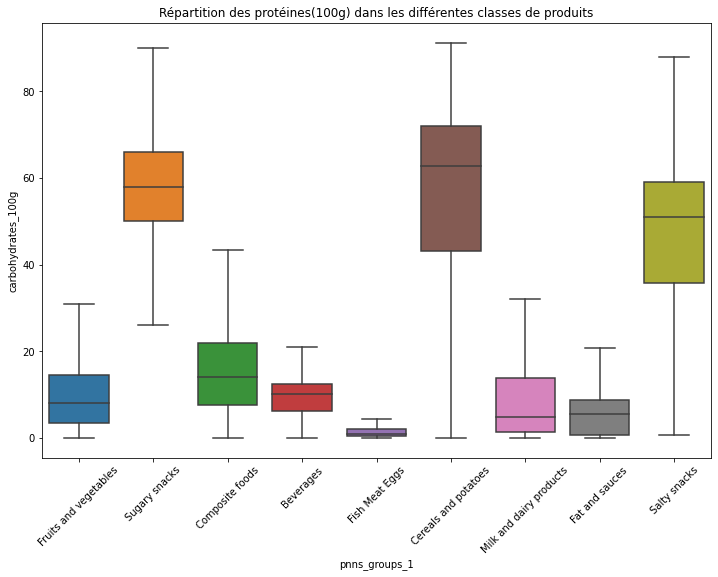

In [455]:
fig = plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data=dataset_drop, x="pnns_groups_1", y="carbohydrates_100g", showfliers=False).set(title='Répartition des protéines(100g) dans les différentes classes de produits')


#### Représentation des proportions des macronutriments dans les categories produits et grade nutritionnel 

In [456]:
df_grouped = dataset.groupby('nutrition_grade_fr').mean()[['carbohydrates_100g','sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g', 'trans-fat_100g']]
df_grouped


carbohydrates_100g  sugars_100g  proteins_100g   fat_100g  \
nutrition_grade_fr                                                              
a                            28.931193     3.486863       8.322755   3.297292   
b                            18.770234     5.234674       5.056066   4.635241   
c                            31.671344    11.278472       6.954613  10.147083   
d                            40.546810    21.532200       8.610401  17.274737   
e                            39.316983    26.717273       9.124544  26.215555   

                    saturated-fat_100g  fiber_100g  sodium_100g  \
nutrition_grade_fr                                                
a                             0.403790    4.441429     0.130356   
b                             0.802525    1.712474     0.206550   
c                             2.021168    3.189697     0.705392   
d                             5.815903    2.487303     0.654617   
e                            13.922478    1.655815     0.613961   

                    trans-fat_100g  
nutrition_grade_fr                  
a                         0.025297  
b                         0.003994  
c                         0.022552  
d                         0.061548  
e                         0.077239

In [457]:
df_grouped_macro= dataset.groupby('nutrition_grade_fr').mean()[['carbohydrates_100g','sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g']]

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

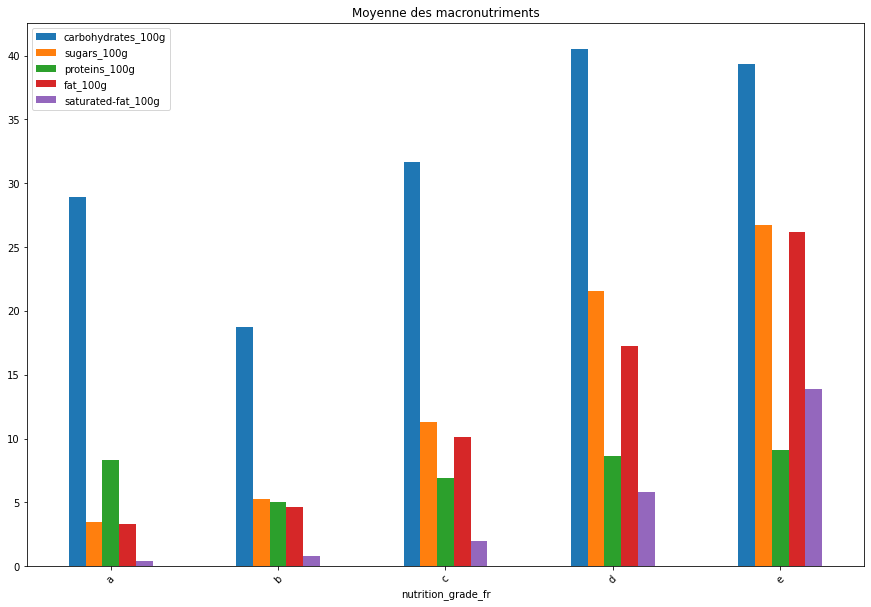

In [458]:
df_grouped_macro.plot.bar(figsize=(15,10))
plt.title("Moyenne des macronutriments")
plt.xticks(rotation=45)


In [459]:
df_grouped_m = dataset.groupby('nutrition_grade_fr').mean()[['carbohydrates_100g', 'fat_100g','proteins_100g', 'fiber_100g', 'sodium_100g']]
df_grouped_m

carbohydrates_100g   fat_100g  proteins_100g  fiber_100g  \
nutrition_grade_fr                                                             
a                            28.931193   3.297292       8.322755    4.441429   
b                            18.770234   4.635241       5.056066    1.712474   
c                            31.671344  10.147083       6.954613    3.189697   
d                            40.546810  17.274737       8.610401    2.487303   
e                            39.316983  26.215555       9.124544    1.655815   

                    sodium_100g  
nutrition_grade_fr               
a                      0.130356  
b                      0.206550  
c                      0.705392  
d                      0.654617  
e                      0.613961

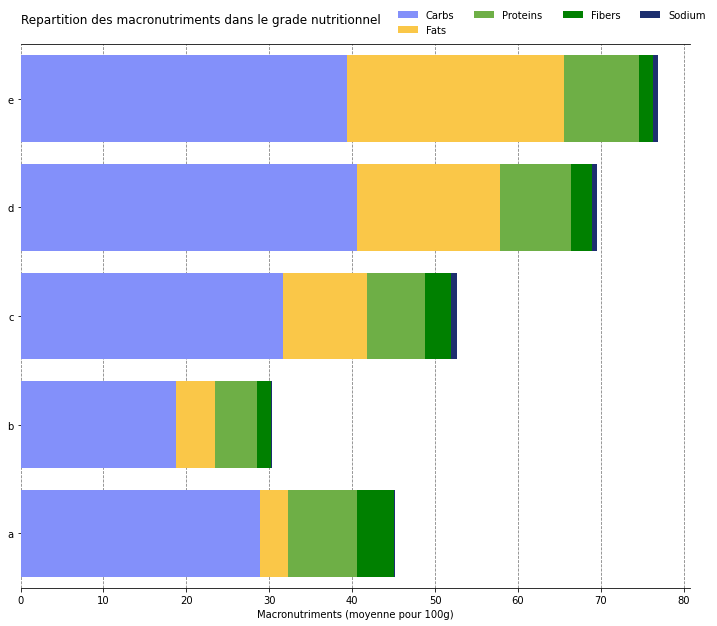

In [460]:
fields = ['carbohydrates_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'sodium_100g']
colors = [ '#8390FA', '#FAC748','#6EAF46', "green", '#1D2F6F',]
labels = [ "Carbs", "Fats", "Proteins", "Fibers", "Sodium"]

# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df_grouped_m) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped_m.index, df_grouped_m[name], left = left, color=colors[idx])
    left = left + df_grouped_m[name]
# title, legend, labels
plt.title('Repartition des macronutriments dans le grade nutritionnel\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Macronutriments (moyenne pour 100g)')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [461]:
#calcul de proportions des macronutriments par nutrition grade
fields = ['carbohydrates_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'sodium_100g']
colors = ['#8390FA', '#FAC748','#6EAF46', "green", '#1D2F6F']
labels = [ "Carbs", "Fat", "Proteins", "Fibers", "Sodium"]


# I'll re calculate (without sugars because already included in carbs)
df_grouped_m['Somme_maconutriments'] = df_grouped_m[fields].sum(axis=1)
# create a column for each macronutriment proportion
for i in fields:
    df_grouped_m['{}_Percent'.format(i)] = df_grouped_m[i] / df_grouped_m['Somme_maconutriments']

df_grouped_m.sort_values('fat_100g')
df_grouped_m


carbohydrates_100g   fat_100g  proteins_100g  fiber_100g  \
nutrition_grade_fr                                                             
a                            28.931193   3.297292       8.322755    4.441429   
b                            18.770234   4.635241       5.056066    1.712474   
c                            31.671344  10.147083       6.954613    3.189697   
d                            40.546810  17.274737       8.610401    2.487303   
e                            39.316983  26.215555       9.124544    1.655815   

                    sodium_100g  Somme_maconutriments  \
nutrition_grade_fr                                      
a                      0.130356             45.123024   
b                      0.206550             30.380565   
c                      0.705392             52.668129   
d                      0.654617             69.573868   
e                      0.613961             76.926858   

                    carbohydrates_100g_Percent  fat_100g_Percent  \
nutrition_grade_fr                                                 
a                                     0.641163          0.073073   
b                                     0.617837          0.152573   
c                                     0.601338          0.192661   
d                                     0.582788          0.248293   
e                                     0.511096          0.340785   

                    proteins_100g_Percent  fiber_100g_Percent  \
nutrition_grade_fr                                              
a                                0.184446            0.098429   
b                                0.166424            0.056367   
c                                0.132046            0.060562   
d                                0.123759            0.035751   
e                                0.118613            0.021525   

                    sodium_100g_Percent  
nutrition_grade_fr                       
a                              0.002889  
b                              0.006799  
c                              0.013393  
d                              0.009409  
e                              0.007981

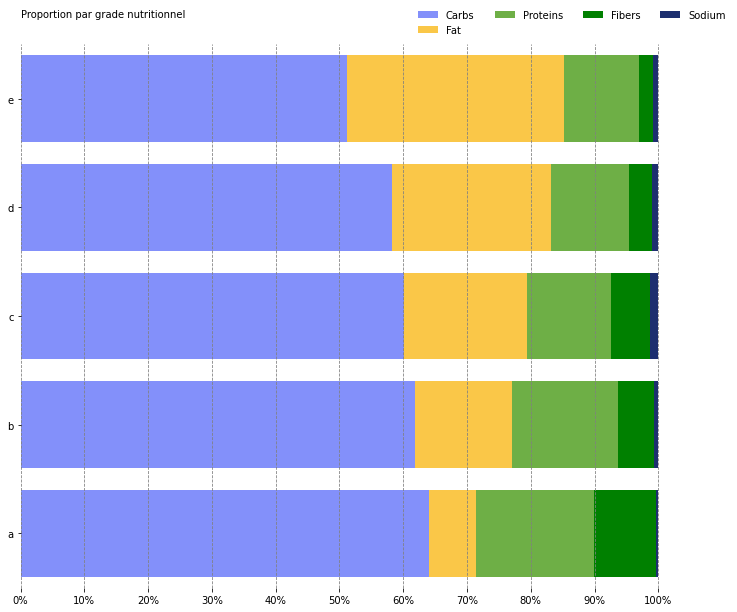

In [462]:
# variables
fields = ['carbohydrates_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'sodium_100g']
colors = ['#8390FA', '#FAC748','#6EAF46', "green", '#1D2F6F']
labels = [ "Carbs", "Fat", "Proteins", "Fibers", "Sodium"]


title = ''
subtitle = 'Proportion par grade nutritionnel'
df=df_grouped_m
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = ['carbohydrates_100g_Percent', 'fat_100g_Percent', 'proteins_100g_Percent', 'fiber_100g_Percent', 'sodium_100g_Percent']
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
#df=df_grouped.sort_values(['carbohydrates_100g_Percent'])
plot_stackedbar_p(df, labels, colors, title, subtitle)

In [463]:
df_grouped_p = dataset_drop.groupby('pnns_groups_1').mean()[['sugars_100g','carbohydrates_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'sodium_100g']]
df_grouped_p

sugars_100g  carbohydrates_100g   fat_100g  \
pnns_groups_1                                                         
Beverages                  11.604084           12.718577   0.823657   
Cereals and potatoes        6.839022           55.068318   6.153842   
Composite foods             2.381977           15.427645   7.618274   
Fat and sauces              5.656278            7.970383  38.397013   
Fish Meat Eggs              0.879325            2.077291  13.623346   
Fruits and vegetables      10.532277           14.331185   2.367763   
Milk and dairy products     7.557810            8.881875  13.566737   
Salty snacks                4.705783           45.430187  30.786419   
Sugary snacks              39.748020           58.039000  19.916158   

                         proteins_100g  fiber_100g  sodium_100g  
pnns_groups_1                                                    
Beverages                     0.748913    0.544653     0.047061  
Cereals and potatoes         10.078581    5.284543     0.254221  
Composite foods               7.630669    1.882073     0.436100  
Fat and sauces                1.868794    0.804759     0.730201  
Fish Meat Eggs               18.693855    0.462681     0.799827  
Fruits and vegetables         2.281581    2.902596     0.187707  
Milk and dairy products       9.732394    0.265042     0.263683  
Salty snacks                 10.409062    4.414968     0.597585  
Sugary snacks                 5.520769    2.984590     0.172548

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

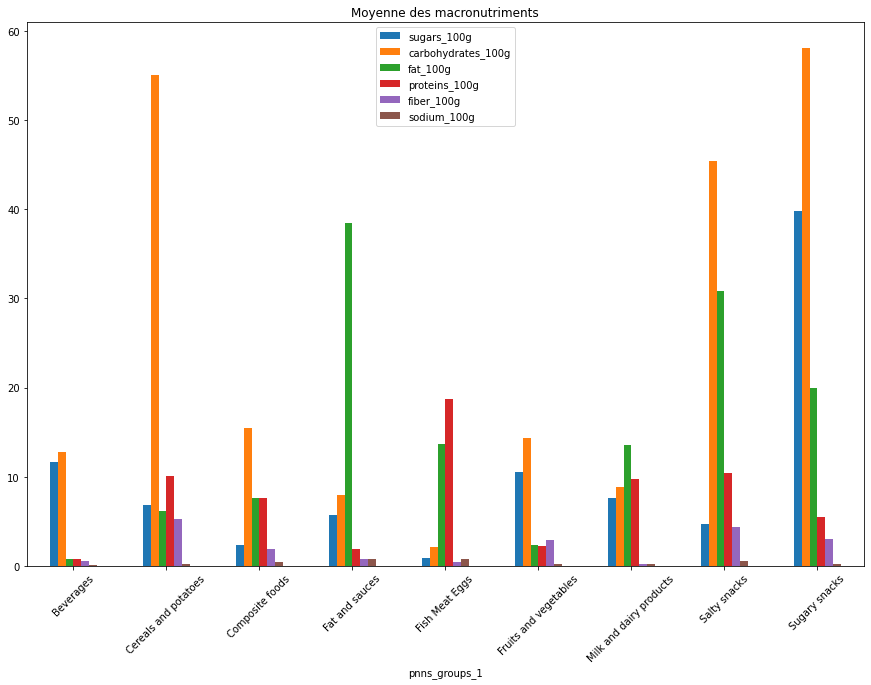

In [464]:
df_grouped_p.plot.bar(figsize=(15,10))
plt.title("Moyenne des macronutriments")
plt.xticks(rotation=45)

In [465]:
#calcul de proportions 
fields = ['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'fiber_100g', 'sodium_100g']

df_grouped_p['Somme_macronutriments'] = df_grouped_p[fields].sum(axis=1)
# create a column for each nutriment proportion of total (100g)
for i in fields:
    df_grouped_p['{}_Percent'.format(i)] = df_grouped_p[i] / df_grouped_p['Somme_macronutriments']
df_grouped_p.sort_values('carbohydrates_100g_Percent', inplace=True)
df_grouped_p

sugars_100g  carbohydrates_100g   fat_100g  \
pnns_groups_1                                                         
Fish Meat Eggs              0.879325            2.077291  13.623346   
Fat and sauces              5.656278            7.970383  38.397013   
Milk and dairy products     7.557810            8.881875  13.566737   
Composite foods             2.381977           15.427645   7.618274   
Salty snacks                4.705783           45.430187  30.786419   
Fruits and vegetables      10.532277           14.331185   2.367763   
Sugary snacks              39.748020           58.039000  19.916158   
Cereals and potatoes        6.839022           55.068318   6.153842   
Beverages                  11.604084           12.718577   0.823657   

                         proteins_100g  fiber_100g  sodium_100g  \
pnns_groups_1                                                     
Fish Meat Eggs               18.693855    0.462681     0.799827   
Fat and sauces                1.868794    0.804759     0.730201   
Milk and dairy products       9.732394    0.265042     0.263683   
Composite foods               7.630669    1.882073     0.436100   
Salty snacks                 10.409062    4.414968     0.597585   
Fruits and vegetables         2.281581    2.902596     0.187707   
Sugary snacks                 5.520769    2.984590     0.172548   
Cereals and potatoes         10.078581    5.284543     0.254221   
Beverages                     0.748913    0.544653     0.047061   

                         Somme_macronutriments  carbohydrates_100g_Percent  \
pnns_groups_1                                                                
Fish Meat Eggs                       35.656999                    0.058258   
Fat and sauces                       49.771151                    0.160141   
Milk and dairy products              32.709731                    0.271536   
Composite foods                      32.994761                    0.467579   
Salty snacks                         91.638222                    0.495756   
Fruits and vegetables                22.070833                    0.649327   
Sugary snacks                        86.633065                    0.669941   
Cereals and potatoes                 76.839506                    0.716667   
Beverages                            14.882861                    0.854579   

                         proteins_100g_Percent  fat_100g_Percent  \
pnns_groups_1                                                      
Fish Meat Eggs                        0.524269          0.382067   
Fat and sauces                        0.037548          0.771471   
Milk and dairy products               0.297538          0.414761   
Composite foods                       0.231269          0.230893   
Salty snacks                          0.113589          0.335956   
Fruits and vegetables                 0.103375          0.107280   
Sugary snacks                         0.063726          0.229891   
Cereals and potatoes                  0.131164          0.080087   
Beverages                             0.050321          0.055343   

                         fiber_100g_Percent  sodium_100g_Percent  
pnns_groups_1                                                     
Fish Meat Eggs                     0.012976             0.022431  
Fat and sauces                     0.016169             0.014671  
Milk and dairy products            0.008103             0.008061  
Composite foods                    0.057042             0.013217  
Salty snacks                       0.048178             0.006521  
Fruits and vegetables              0.131513             0.008505  
Sugary snacks                      0.034451             0.001992  
Cereals and potatoes               0.068774             0.003308  
Beverages                          0.036596             0.003162

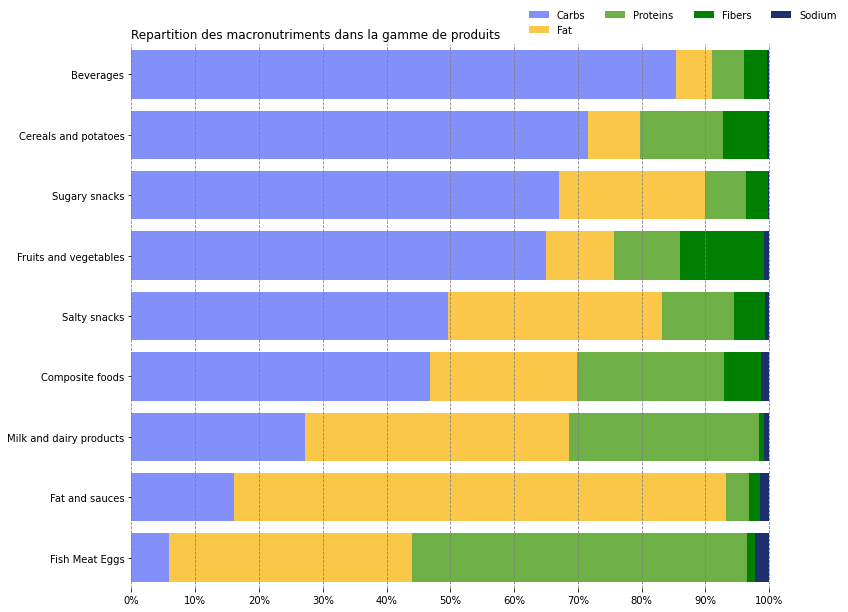

In [466]:
# variables
fields = ['carbohydrates_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'sodium_100g']
colors = ['#8390FA', '#FAC748','#6EAF46', "green", '#1D2F6F']
labels = [ "Carbs", "Fat", "Proteins", "Fibers", "Sodium"]
title = 'Repartition des macronutriments dans la gamme de produits'
subtitle = ''
df=df_grouped_p
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = ['carbohydrates_100g_Percent', 'fat_100g_Percent', 'proteins_100g_Percent',  'fiber_100g_Percent',  'sodium_100g_Percent']
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
df=df_grouped_p.sort_values(['carbohydrates_100g_Percent'])
plot_stackedbar_p(df, labels, colors, title, subtitle)

### Représentation des pnns et grade nutritionnel 

Tableau de contingence

In [467]:
DF=dataset_drop[['nutrition_grade_fr', 'pnns_groups_1']].groupby(['nutrition_grade_fr', 'pnns_groups_1']).size().unstack()

In [468]:
DF

pnns_groups_1       Beverages  Cereals and potatoes  Composite foods  \
nutrition_grade_fr                                                     
a                         258                  3437             1305   
b                         819                  1049             1765   
c                        1563                  1350             1585   
d                         907                   852              869   
e                        2150                   114               70   

pnns_groups_1       Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
nutrition_grade_fr                                                          
a                               93             540                   2942   
b                              242             737                    711   
c                              972            1444                    491   
d                             1689            1580                     48   
e                              731            1061                      3   

pnns_groups_1       Milk and dairy products  Salty snacks  Sugary snacks  
nutrition_grade_fr                                                        
a                                       637            55             68  
b                                      1377            85            339  
c                                      1696           667            872  
d                                      2886          1183           3713  
e                                       265           367           5004

In [469]:
DF['Somme_pnns_nutritionGrade']=DF.sum(axis=1)

In [470]:
DF

pnns_groups_1       Beverages  Cereals and potatoes  Composite foods  \
nutrition_grade_fr                                                     
a                         258                  3437             1305   
b                         819                  1049             1765   
c                        1563                  1350             1585   
d                         907                   852              869   
e                        2150                   114               70   

pnns_groups_1       Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
nutrition_grade_fr                                                          
a                               93             540                   2942   
b                              242             737                    711   
c                              972            1444                    491   
d                             1689            1580                     48   
e                              731            1061                      3   

pnns_groups_1       Milk and dairy products  Salty snacks  Sugary snacks  \
nutrition_grade_fr                                                         
a                                       637            55             68   
b                                      1377            85            339   
c                                      1696           667            872   
d                                      2886          1183           3713   
e                                       265           367           5004   

pnns_groups_1       Somme_pnns_nutritionGrade  
nutrition_grade_fr                             
a                                        9335  
b                                        7124  
c                                       10640  
d                                       13727  
e                                        9765

In [471]:
DF_T=DF.T
DF_T.head(11)

nutrition_grade_fr            a     b      c      d     e
pnns_groups_1                                            
Beverages                   258   819   1563    907  2150
Cereals and potatoes       3437  1049   1350    852   114
Composite foods            1305  1765   1585    869    70
Fat and sauces               93   242    972   1689   731
Fish Meat Eggs              540   737   1444   1580  1061
Fruits and vegetables      2942   711    491     48     3
Milk and dairy products     637  1377   1696   2886   265
Salty snacks                 55    85    667   1183   367
Sugary snacks                68   339    872   3713  5004
Somme_pnns_nutritionGrade  9335  7124  10640  13727  9765

In [472]:
DF_T['Somme_nutritioGrade_pnns'] = DF_T.sum(axis=1)

In [473]:
DF_T

nutrition_grade_fr            a     b      c      d     e  \
pnns_groups_1                                               
Beverages                   258   819   1563    907  2150   
Cereals and potatoes       3437  1049   1350    852   114   
Composite foods            1305  1765   1585    869    70   
Fat and sauces               93   242    972   1689   731   
Fish Meat Eggs              540   737   1444   1580  1061   
Fruits and vegetables      2942   711    491     48     3   
Milk and dairy products     637  1377   1696   2886   265   
Salty snacks                 55    85    667   1183   367   
Sugary snacks                68   339    872   3713  5004   
Somme_pnns_nutritionGrade  9335  7124  10640  13727  9765   

nutrition_grade_fr         Somme_nutritioGrade_pnns  
pnns_groups_1                                        
Beverages                                      5697  
Cereals and potatoes                           6802  
Composite foods                                5594  
Fat and sauces                                 3727  
Fish Meat Eggs                                 5362  
Fruits and vegetables                          4195  
Milk and dairy products                        6861  
Salty snacks                                   2357  
Sugary snacks                                  9996  
Somme_pnns_nutritionGrade                     50591

In [474]:
cont_table=DF_T.reset_index()
cont_table


nutrition_grade_fr              pnns_groups_1     a     b      c      d     e  \
0                                   Beverages   258   819   1563    907  2150   
1                        Cereals and potatoes  3437  1049   1350    852   114   
2                             Composite foods  1305  1765   1585    869    70   
3                              Fat and sauces    93   242    972   1689   731   
4                              Fish Meat Eggs   540   737   1444   1580  1061   
5                       Fruits and vegetables  2942   711    491     48     3   
6                     Milk and dairy products   637  1377   1696   2886   265   
7                                Salty snacks    55    85    667   1183   367   
8                               Sugary snacks    68   339    872   3713  5004   
9                   Somme_pnns_nutritionGrade  9335  7124  10640  13727  9765   

nutrition_grade_fr  Somme_nutritioGrade_pnns  
0                                       5697  
1                                       6802  
2                                       5594  
3                                       3727  
4                                       5362  
5                                       4195  
6                                       6861  
7                                       2357  
8                                       9996  
9                                      50591

In [475]:
#calcul de proportions 
fields = ["a", "b", "c", "d", "e"]
df=cont_table 
# create a column for each fields and rank proportion of total 
for i in fields:
  df['{}_Percent'.format(i)] = df[i] / df['Somme_nutritioGrade_pnns']

df

nutrition_grade_fr              pnns_groups_1     a     b      c      d     e  \
0                                   Beverages   258   819   1563    907  2150   
1                        Cereals and potatoes  3437  1049   1350    852   114   
2                             Composite foods  1305  1765   1585    869    70   
3                              Fat and sauces    93   242    972   1689   731   
4                              Fish Meat Eggs   540   737   1444   1580  1061   
5                       Fruits and vegetables  2942   711    491     48     3   
6                     Milk and dairy products   637  1377   1696   2886   265   
7                                Salty snacks    55    85    667   1183   367   
8                               Sugary snacks    68   339    872   3713  5004   
9                   Somme_pnns_nutritionGrade  9335  7124  10640  13727  9765   

nutrition_grade_fr  Somme_nutritioGrade_pnns  a_Percent  b_Percent  c_Percent  \
0                                       5697   0.045287   0.143760   0.274355   
1                                       6802   0.505293   0.154219   0.198471   
2                                       5594   0.233286   0.315517   0.283339   
3                                       3727   0.024953   0.064932   0.260800   
4                                       5362   0.100709   0.137449   0.269302   
5                                       4195   0.701311   0.169487   0.117044   
6                                       6861   0.092844   0.200700   0.247194   
7                                       2357   0.023335   0.036063   0.282987   
8                                       9996   0.006803   0.033914   0.087235   
9                                      50591   0.184519   0.140816   0.210314   

nutrition_grade_fr  d_Percent  e_Percent  
0                    0.159207   0.377392  
1                    0.125257   0.016760  
2                    0.155345   0.012513  
3                    0.453180   0.196136  
4                    0.294666   0.197874  
5                    0.011442   0.000715  
6                    0.420638   0.038624  
7                    0.501909   0.155706  
8                    0.371449   0.500600  
9                    0.271333   0.193019

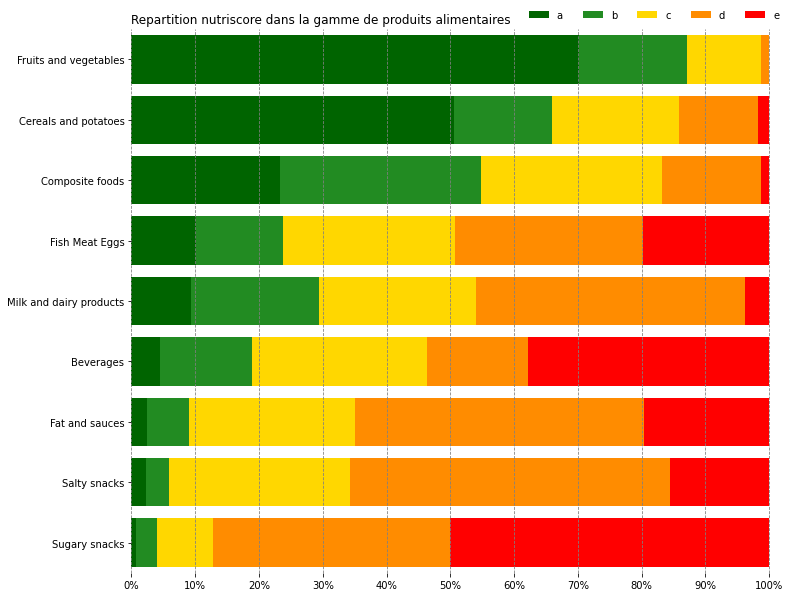

In [476]:
# variables
labels = ["a", "b", "c", "d", "e"]
colors = ['darkgreen', 'forestgreen', 'gold', 'darkorange', 'red']
title = 'Repartition nutriscore dans la gamme de produits alimentaires'
subtitle=''
df=cont_table.head(9)
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = ['a_Percent', 'b_Percent', 'c_Percent', 'd_Percent', 'e_Percent']
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df['pnns_groups_1'], df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=5, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
df=df.sort_values(['a_Percent'])
plot_stackedbar_p(df, labels, colors, title, subtitle)

# PARTIE 4 : Hypothèses et tests statistiques 

## Chi-2

Chi-2
H0: les variables qualitatives pnns et grade nutritionnel sont indépendantes
H1: les variables ne sont pas indépendantes 
p<0.05 : H0 rejetée

In [477]:
#Chi-2
expected, observed, stats = pg.chi2_independence(dataset[dataset['pnns_groups_1']!='unknown'], x='pnns_groups_1', y='nutrition_grade_fr')
stats

/usr/local/lib/python3.7/dist-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.



test    lambda           chi2   dof  pval    cramer  power
0             pearson  1.000000   31157.223625  32.0   0.0  0.392385    1.0
1        cressie-read  0.666667   30277.964210  32.0   0.0  0.386809    1.0
2      log-likelihood  0.000000   31647.906180  32.0   0.0  0.395463    1.0
3       freeman-tukey -0.500000   36957.151828  32.0   0.0  0.427349    1.0
4  mod-log-likelihood -1.000000   51444.284171  32.0   0.0  0.504199    1.0
5              neyman -2.000000  345630.509719  32.0   0.0  1.306891    1.0

In [478]:
observed #la réalité

nutrition_grade_fr          a     b     c     d     e
pnns_groups_1                                        
Beverages                 258   819  1563   907  2150
Cereals and potatoes     3437  1049  1350   852   114
Composite foods          1305  1765  1585   869    70
Fat and sauces             93   242   972  1689   731
Fish Meat Eggs            540   737  1444  1580  1061
Fruits and vegetables    2942   711   491    48     3
Milk and dairy products   637  1377  1696  2886   265
Salty snacks               55    85   667  1183   367
Sugary snacks              68   339   872  3713  5004

In [479]:
expected #attendu

nutrition_grade_fr                 a            b            c            d  \
pnns_groups_1                                                                 
Beverages                1051.204661   802.226246  1198.159356  1545.783222   
Cereals and potatoes     1255.098140   957.827440  1430.556423  1845.606017   
Composite foods          1032.199205   787.722243  1176.497005  1517.835939   
Fat and sauces            687.702259   524.819592   783.840604  1011.257516   
Fish Meat Eggs            989.390801   755.053033  1127.704137  1454.886719   
Fruits and vegetables     774.057145   590.721275   882.267597  1138.241288   
Milk and dairy products  1265.984760   966.135558  1442.964954  1861.614655   
Salty snacks              434.911249   331.902275   495.710304   639.531517   
Sugary snacks            1844.451780  1407.592339  2102.299619  2712.243126   

nutrition_grade_fr                 e  
pnns_groups_1                         
Beverages                1099.626515  
Cereals and potatoes     1312.911980  
Composite foods          1079.745607  
Fat and sauces            719.380028  
Fish Meat Eggs           1034.965310  
Fruits and vegetables     809.712696  
Milk and dairy products  1324.300073  
Salty snacks              454.944654  
Sugary snacks            1929.413137

Les pnns et le nutriscore ne sont pas indépendantes. H0 rejetée car p<0,05

##ANOVA

In [480]:
df = dataset_drop
aov = pg.anova(dv='energy_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)

Source            SS     DF            MS         F  p-unc  \
0  nutrition_grade_fr  9.263974e+09      4  2.315994e+09  4859.546    0.0   
1              Within  2.410860e+10  50586  4.765864e+05       NaN    NaN   

     np2  
0  0.278  
1    NaN

In [481]:
df = dataset_drop
aov = pg.anova(dv='energy_100g', between='pnns_groups_1', data=df,
               detailed=True)
aov.round(3)

Source            SS     DF            MS         F  p-unc    np2
0  pnns_groups_1  1.692999e+10      8  2.116249e+09  6510.177    0.0  0.507
1         Within  1.644258e+10  50582  3.250678e+05       NaN    NaN    NaN

In [482]:
df = dataset_drop
aov = pg.anova(dv='carbohydrates_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)

Source            SS     DF          MS        F  p-unc    np2
0  nutrition_grade_fr  1.802569e+06      4  450642.361  650.415    0.0  0.049
1              Within  3.504869e+07  50586     692.854      NaN    NaN    NaN

In [483]:
df = dataset_drop
aov = pg.anova(dv='carbohydrates_100g', between='pnns_groups_1', data=df,
               detailed=True)
aov.round(3)

Source            SS     DF           MS          F  p-unc    np2
0  pnns_groups_1  2.530121e+07      8  3162651.583  13850.436    0.0  0.687
1         Within  1.155005e+07  50582      228.343        NaN    NaN    NaN

In [484]:
df = dataset_drop
aov = pg.anova(dv='proteins_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)


Source           SS     DF         MS        F  p-unc    np2
0  nutrition_grade_fr    70917.134      4  17729.283  344.966    0.0  0.027
1              Within  2599834.629  50586     51.394      NaN    NaN    NaN

In [485]:
df = dataset_drop
aov = pg.anova(dv='Nb_ingredients', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)


Source           SS     DF         MS        F  p-unc    np2
0  nutrition_grade_fr   150120.114      4  37530.029  381.133    0.0  0.029
1              Within  4981179.517  50586     98.470      NaN    NaN    NaN

In [486]:
df = dataset
aov = pg.anova(dv='sodium_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)

Source          SS      DF        MS        F  p-unc    np2
0  nutrition_grade_fr   11792.522       4  2948.131  793.204    0.0  0.014
1              Within  821882.263  221130     3.717      NaN    NaN    NaN

In [487]:
df = dataset
aov = pg.anova(dv='ingredients_that_may_be_from_palm_oil_n', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)

Source         SS      DF      MS       F  p-unc    np2
0  nutrition_grade_fr     82.132       4  20.533  272.44    0.0  0.006
1              Within  14779.401  196099   0.075     NaN    NaN    NaN

In [488]:
df = dataset_drop
aov = pg.anova(dv='fiber_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3)

Source          SS     DF        MS        F  p-unc   np2
0  nutrition_grade_fr   26166.067      4  6541.517  659.635    0.0  0.05
1              Within  501654.918  50586     9.917      NaN    NaN   NaN

In [489]:
df = dataset
aov = pg.anova(dv='cholesterol_100g', between='nutrition_grade_fr', data=df,
               detailed=True)
aov.round(3) 

Source         SS      DF     MS       F  p-unc    np2
0  nutrition_grade_fr     14.480       4  3.620  43.417    0.0  0.001
1              Within  18436.907  221130  0.083     NaN    NaN    NaN

##PCA

In [545]:
data_pca=dataset_drop[['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g' ]]

In [546]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50591 entries, 174 to 320763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_100g         50591 non-null  float64
 1   fat_100g            50591 non-null  float64
 2   saturated-fat_100g  50479 non-null  float64
 3   trans-fat_100g      50591 non-null  float64
 4   carbohydrates_100g  50591 non-null  float64
 5   sugars_100g         50479 non-null  float64
 6   fiber_100g          50591 non-null  float64
 7   proteins_100g       50591 non-null  float64
 8   sodium_100g         50591 non-null  float64
dtypes: float64(9)
memory usage: 5.9 MB


In [547]:
# Fonctions outils du TP ACP
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing  


In [548]:
# Fonctions outils pour l'ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [549]:
data=data_pca.fillna(data_pca.mean())

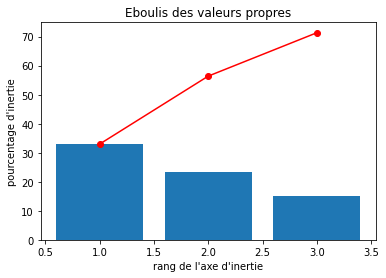

In [550]:
# choix du nombre de composantes à calculer
n_comp = 3

# import de l'échantillon et des informations relatives aux cours
data = data_pca.fillna(data_pca.mean())

features=data.columns
df_pca=data[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
       'proteins_100g', 'sodium_100g', 'fiber_100g']]    

# préparation des données pour l'ACP
X = df_pca.values
features = df_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)



In [543]:
X_projected=pca.transform(X_scaled)

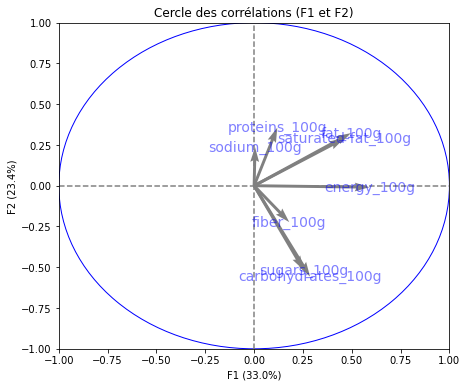

In [551]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels=features)
plt.show()

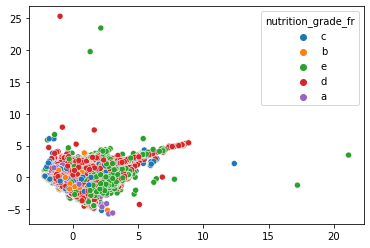

In [522]:
sns.scatterplot(x=X_projected[:,0], y=X_projected[:,1], hue=dataset_drop['nutrition_grade_fr'])

## Entraîner un algorithme k-NN 
Exemple: prédiction de la variable catégorielle "nutrition_grade_fr"

In [523]:
from sklearn.datasets import fetch_openml

In [524]:
df_knn=dataset[['nutrition_grade_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g']]

In [525]:
df_knn.fillna(df_knn.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [526]:
X = df_knn.drop(['nutrition_grade_fr'],axis=1)
y = df_knn['nutrition_grade_fr']

In [527]:
dataset_variables_overview(df_knn)

--------------------------------------------------------------------------
Data : ['df_knn']
--------------------------------------------------------------------------


Variable name Variable type Distinct  % distinct Missing  % missing  \
0  nutrition_grade_fr        object        5    0.000023       0        0.0   
0         energy_100g       float64     3731    0.016872       0        0.0   
0            fat_100g       float64     3260    0.014742       0        0.0   
0  saturated-fat_100g       float64     2155    0.009745       0        0.0   
0      trans-fat_100g       float64      412    0.001863       0        0.0   
0    cholesterol_100g       float64      497    0.002247       0        0.0   
0  carbohydrates_100g       float64     5232    0.023660       0        0.0   
0         sugars_100g       float64     3935    0.017795       0        0.0   
0          fiber_100g       float64      974    0.004405       0        0.0   
0       proteins_100g       float64     2412    0.010907       0        0.0   
0         sodium_100g       float64     4744    0.021453       0        0.0   

          Mean    Median        Skew       Kurtosis        Variance  \
0                                                                     
0  1196.142882    1196.0  455.306909  211660.206265  48828721.26581   
0    13.337667      8.93    1.886887       5.072125      240.640275   
0     4.966966      1.79    3.232044      19.718146       57.154529   
0     0.041821       0.0   64.930781    6148.835632        0.757216   
0     0.011931       0.0  274.498361   79460.210158        0.083439   
0    33.237558     28.36    0.472245      -1.042596      744.522711   
0    15.007854       5.0    1.660152        2.26472      392.735243   
0     2.665055       1.5    5.269186      56.238353        17.96189   
0     7.772901       5.7    2.012443       7.694208       65.185885   
0     0.503331  0.255906   24.222218     906.969354        3.769981   

         Stdev  min      25%       50%     75%        max  
0                                                          
0  6987.755095  0.0    452.0    1196.0  1715.0  3251373.0  
0    15.512584  0.0      1.1      8.93    20.2      100.0  
0     7.560061  0.0      0.0      1.79    7.14      100.0  
0     0.870182  0.0      0.0       0.0     0.0      100.0  
0     0.288859  0.0      0.0       0.0     0.0     95.238  
0    27.285943  0.0      7.9     28.36   57.14      100.0  
0    19.817549  0.0      1.3       5.0   23.08      100.0  
0     4.238147  0.0      0.0       1.5    3.48      100.0  
0     8.073778  0.0      1.9       5.7   10.71      100.0  
0     1.941644  0.0  0.03937  0.255906   0.536      100.0

In [528]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) #training set=80% , testing set=20% , randoms_state:int or none: an int will produce the same results across different calls. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=3 is 0.8635222827684446


In [529]:
Pred_y

array(['d', 'd', 'a', ..., 'd', 'b', 'e'], dtype=object)

In [530]:
y_test

298612    d
152983    d
225411    a
42809     b
159984    e
         ..
21830     b
70952     d
149667    d
64691     a
61675     e
Name: nutrition_grade_fr, Length: 44227, dtype: object

In [531]:
from sklearn.metrics import confusion_matrix

Text(83.40000000000006, 0.5, 'Predicted class')

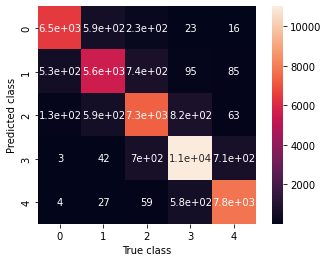

In [532]:
#matrice de confusion : évaluation du modèle 
m=confusion_matrix(y_test, Pred_y)
sns.heatmap(m.T, square=True, annot=True)
plt.ylabel("Matrice de confusion")
plt.xlabel("True class")
plt.ylabel("Predicted class")
#Pécision du modèle sur les données test

Je compare l'efficacité d'apprentissage du modèle avec autre valeur de k 

In [533]:
#Train Model and Predict
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=6 is",metrics.accuracy_score(y_test, Pred_y ))

Accuracy of model at K=6 is 0.8558798923734371


In [534]:
Pred_y

array(['d', 'd', 'a', ..., 'd', 'a', 'e'], dtype=object)

In [535]:
y_test

298612    d
152983    d
225411    a
42809     b
159984    e
         ..
21830     b
70952     d
149667    d
64691     a
61675     e
Name: nutrition_grade_fr, Length: 44227, dtype: object

Text(83.40000000000006, 0.5, 'Predicted class')

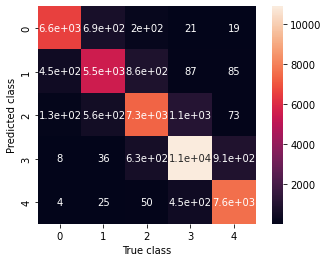

In [536]:
#matrice de confusion : évaluation du modèle 
m=confusion_matrix(y_test, Pred_y)
sns.heatmap(m.T, square=True, annot=True)
plt.ylabel("Matrice de confusion, k=6")
plt.xlabel("True class")
plt.ylabel("Predicted class")
#Pécision du modèle sur les données test